1. Introduction
    1. Research topic
    1. Literature review
    1. Aims and Objectives
1. Data Acquisition and Preparation
    1. Data Acquisition
    1. Preparation
1. Pre-Processing
1. Methodology
    1. Comparative Analysis of Exchange Data
    1. Dataset Labeling
    1. Random forest algorithm
    1. Support vector machines algorithm
    1. Extreme gradient boosting (XGBoost)
1. Conclusion
1. References

# Introduction

<p style="text-align: justify;text-justify: inter-word;">
In the context of investment analysis, identifying the most attractive stocks from a multitude of options is a multifaceted and time-intensive endeavor. As articulated by Gordon (1959), the process of evaluating stock attractiveness involves a nuanced weighing of various factors, such as dividend yield, sales growth, payout ratios, retention ratios, etc ... Through this meticulous evaluation, investors aim to ascertain whether a stock presents an enticing opportunity at its current valuation. In this coursework, we embark on a comparative exploration of diverse machine learning models to ascertain their efficacy in discerning the attractiveness of company shares. Our objective is to investigate whether these models can effectively differentiate between stocks that present compelling investment prospects and those that do not. The stocks under examination are constituents of the following indexes FTSE-250 and NASDAQ, and have disbursed dividends during the year 2023.
</p>

## Research topic

<p style="text-align: justify;text-justify: inter-word;">
In this paper, we undertake a comprehensive investigation into the feasibility and efficacy of predicting the attractiveness of shares using data extracted from two prominent stock exchanges: the FTSE-250 from the London Stock Exchange and the NASDAQ. Leveraging data obtained from the London Stock Exchange's network and the previously scraped from the NASDAQ APIs (Steffens, 2023), we aim to advance our understanding of share attractiveness prediction and explore potential similarities and disparities between the two datasets.
</p>

- Comparative Analysis of Exchange Data: Our initial objective is to conduct a comparative analysis of key statistics derived from the FTSE-250 and NASDAQ datasets. By scrutinizing metrics such as dividend yield, payout ratio, annual dividends per share, number of times the dividends were paid, and the retention ratio. We seek to assess the degree of similarity between the two exchanges' share data.
- Predictive Modeling with NASDAQ Dataset: Building upon insights gleaned from the comparative analysis, our subsequent objective is to develop predictive models using the NASDAQ dataset. Drawing upon machine learning techniques, we endeavor to ascertain whether it is possible to infer the attractiveness of shares within an unknown dataset based on patterns and characteristics identified in the training dataset.

<p style="text-align: justify;text-justify: inter-word;">
The training dataset will be composed of the NASDAQ shares that have disbursed dividends during the year 2023, the NASDAQ index is composed of 4,136 active companies, only 947 have previously distributed dividends, and from this subset, merely 786 companies paid dividends specifically in 2023. The test dataset will be composed of the FTSE 250 shares that paid dividends in 2023. According to Coutts (2024), the FTSE 250 is a mid-cap stock index comprising the 101st to 350th largest companies listed on the London Stock Exchange. Established in 1992, the companies which make up the 250 are more domestically focused than those in the FTSE 100. Typically, more than half of their sales are domestic compared to less than a quarter for FTSE 100 companies. As a result, the FTSE 250 is viewed by many investors as a better indicator of the overall UK economy. This paper aims to confirm whether companies in a similar situation can be classified as attractive independently of the country if US or the UK.
</p>


## Literature review

<p style="text-align: justify;text-justify: inter-word;">
Stock market prediction in developed countries has been a prominent research area with numerous studies addressing this subject. Kimoto, et al. (1990) conducted one of the pioneering studies by comparing regression models and artificial neural networks on the Tokyo Stock Price Index (TOPIX) to forecast buying and selling times.
</p>
<p style="text-align: justify;text-justify: inter-word;">
In this paper, we examine the performance of a single machine learning (ML) model across different indexes. Phua, Xiaotian Zhu, and Chung Haur Koh. (2003) undertook a seminal investigation where they assessed the predictive capabilities of a single algorithm across various indices, including Germany’s DAX index, along with the US’s DJIA, FTSE-100, and NASDAQ indices, utilizing the YSA algorithm. They achieved a remarkable accuracy rate exceeding 60% in predicting index movements.
</p>
<p style="text-align: justify;text-justify: inter-word;">
Ayyildiz and Iskenderoglu (2024) further advanced this line of research by studying a single ML model's efficacy in predicting stock market index movements in developed countries. Their analysis encompassed indices such as NYSE 100, NIKKEI 225 (Japan), FTSE 100, CAC 40, DAX 30, FTSE MIB, and TSX. The authors employed various algorithms, including decision trees, random forests, k-nearest neighbors, naive Bayes, logistic regression, support vector machines, and artificial neural networks. Their findings corroborated that artificial neural networks, logistic regression, and support vector machines consistently achieved an accuracy rate exceeding 70% in predicting directional movements across all indices.
</p>

## Aims and Objectives

<p style="text-align: justify;text-justify: inter-word;">
The aim of this project is to explore the efficacy of predictive modeling in determining share attractiveness, as well as elucidating any discernible patterns or discrepancies between the FTSE-250 and NASDAQ datasets. By advancing our understanding of share market dynamics and predictive modeling techniques, we aim to provide valuable insights for investors and market practitioners navigating the complex landscape of financial markets.
</p>
<p style="text-align: justify;text-justify: inter-word;">
Over this coursework, we will cover the following points:
</p>

1. FTSE-250 index data Acquisition
1. Dataset Preparation
1. Pre-Processing
1. Model training
1. Model evaluations


# Data Acquisition and Preparation

<p style="text-align: justify;text-justify: inter-word;">Along this coursework, authentic data was exclusively sourced from various platforms, including London Stock Exchange APIs and LSEG website. The acquisition of this data involved employing web scraping techniques. "Web scraping is the process of collecting and parsing raw data from the Web" (Amos, 2023). Considering the varied sources of this data, combining them into a unified dataset was imperative to ensure proper processing. The preparation of this dataset entailed extracting the specific sample needed to effectively execute the proposed framework.</p>

<p style="text-align: justify;text-justify: inter-word;">The data acquisition and preparation processes collectively require more than 20 minutes for execution. To streamline the experiment, the resultant datasets ftse-dataset, ftse-dividends, ftse-sectors, ftse-sub-sectors, and ftse-symbols from the data acquisition phase will be shared alongside this paper. Due to the time-consuming nature of these processes, the data acquisition was segmented into three parts (symbols, sectors, and dividends acquisition) to mitigate potential connection issues. This segmentation allows for minimizing the impact of errors; for instance, if issues arise during dividends acquisition, there is no need to re-execute the initial two steps. For ongoing validation or execution of the experiment with the most recent data, the pre-generated datasets can be deleted, as they will automatically regenerate during the subsequent execution.</p>

<p style="text-align: justify;text-justify: inter-word;">
After the data Acquisition and preparation phase, the created unit test will be presented. A vast code coverage it's important to ensure the code quality, and also mitigates the chances of a new code issue being introduced.
</p>


## Data Acquisition

<p style="text-align: justify;text-justify: inter-word;">In order to create a single dataset to assess the attractiveness of a stock, the following data acquisition steps are necessary:</p>

- Extract the list of negotiable companies in the FTSE-250 index
- Derive the sub-sector from each negotiable stock
- Derive the sector from the sub-sectors
- Derive the dividend metrics to each stock

<p style="text-align: justify;text-justify: inter-word;">To extract the list of negotiable companies in the FTSE-250 index, it will be used the London Stock Exchange (LSEG) the following paginated API: https://api.londonstockexchange.com/api/v1/components/refresh to identify the list of shares constituents of the FTSE-250 index, the above API has a total of 13 pages and returns 20 elements per page. This API returns the following information: company description, company code, currency, symbol, and last price. At this moment we will be focusing on the columns: company description, company code, and symbol.
</p>

<p style="text-align: justify;text-justify: inter-word;">
In order to derive the sub-sectors from each negotiable stock, the following London Stock Exchange API will be used https://api.londonstockexchange.com/api/gw/lse/instruments/alldata/{symbol}, this API provides us detailed information about the share such as BID, trade volume, values of the market open and close, the highest and lowest values of the day, sector code, and sub-sector code. The sub-sector code is a string value in a numeric format for instance: "30101010", while the sector code presents the same format  "301010".
</p>

<p style="text-align: justify;text-justify: inter-word;">
To derive the sector from the sub-sectors, it will be necessary to exchange the sub-sector code by the sector description, this is a required step to normalize the sectors in all used datasets. The LSEG provides an Excel file detailing the industries, sectors, and sub-sectors constituents of the FTSE indexes. The desired information is present in the first Sheet, where can filter the subsector code in order to extract the Sector description. The Excel file can be downloaded from: https://www.lseg.com/content/dam/ftse-russell/en_us/documents/other/icb-structure-and-definitions.xlsx
</p>

<p style="text-align: justify;text-justify: inter-word;">The derivation of the dividends is from the LSE share report. The LSE report is a PDF file that contains the dividends data, valuation metrics, growth and profitability metrics, price performance, and the dividends history. Some companies did not provide the LSE report for this paper these companies will be considered as companies that did not disburse dividends. From the available attributes, we are interested in the following fields: dividend yield, annual dividend, payout ratio, and dividend history. Of the 250 companies constituents of the FTSE-250 index, only 127 companies already distributed dividends.
</p>

In [162]:
#required libraries to run the expirement
import numpy as np
import matplotlib.pyplot as plt
import os.path
import pandas as pd
import requests
import tabula
import time
import unittest
import urllib.error
import xgboost as xgb

from bs4 import BeautifulSoup
from collections import Counter
from json import loads
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from xgboost import XGBRFClassifier, plot_importance

In [2]:
#webscrapping functions based on the BeautifulSoup
def get_soup(URL, jar=None):
    request_headers = {
        "Upgrade-Insecure-Requests": "1",
        "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7",
        "Accept-Language": "en-US,en;q=0.9",
        "Accept-Encondig": "gzip, deflate, br",
    }
    if jar:
        response = requests.get(URL, cookies=jar, headers= request_headers)
    else:
        response = requests.get(URL, headers= request_headers)
        jar = requests.cookies.RequestsCookieJar()
    print(response.url)
    data = response.text
    soup = BeautifulSoup(data, "html.parser")
    return soup, jar

def post_soup(URL, body, jar=None):
    response = requests.post(URL, json = body)
    print(response.url)
    data = response.text
    soup = BeautifulSoup(data, "html.parser")
    return soup, jar

In [3]:
#Derive the list of active stocks from the api https://api.londonstockexchange.com/api/v1/components/refresh
def fste250_create_symbols():
    if (os.path.isfile("data/ftse-symbols.csv") == True):
        return
    symbols_dataset = pd.DataFrame(columns=["Symbol", "Company Name"])
    total_pages = 13
    url = 'https://api.londonstockexchange.com/api/v1/components/refresh'
    body = {
        "path":"ftse-constituents",
        "components":[{"componentId":"block_content%3Aafe540a2-2a0c-46af-8497-407dc4c7fd71"}]
    }
    for page in range(total_pages):
        body['parameters'] = f"indexname%3Dftse-250%26page%3D{page}%26tab%3Dtable%26tabId%3D1602cf04-c25b-4ea0-a9d6-64040d217877"
        response = post_soup(url, body)
        page_content = loads(response[0].text)[0]["content"][0]["value"]["content"]
        for content in page_content:
            dataframe = pd.DataFrame([{
                "Symbol": content["tidm"],
                "Company Name": content["issuername"], 
                "Company Code": content["issuercode"]
            }])
            symbols_dataset = pd.concat([symbols_dataset, dataframe], ignore_index=True)
        time.sleep(0.5)
    symbols_dataset.to_csv("data/ftse-symbols.csv", index=False)    

In [4]:
#Derive the sub-sectors from each share it's required to determine the sector
def ftse250_create_sub_sectors():
    if (os.path.isfile("data/ftse-sub-sectors.csv") == True):
        return
    ftse_symbols = pd.read_csv("data/ftse-symbols.csv")
    sectors = []
    for symbol in ftse_symbols["Symbol"]:
        response = get_soup(f"https://api.londonstockexchange.com/api/gw/lse/instruments/alldata/{symbol}")
        try:
            response = loads(response[0].text)
            sectors.append(response["subsectorcode"])
        except Exception:
            print(f"Error retriving the symbol {symbol}")
            sectors.append(None)
        time.sleep(0.5)
    ftse_symbols["Subsector Code"] = sectors
    ftse_symbols.to_csv("data/ftse-sub-sectors.csv", index=False)

In [5]:
#The companies sectors are derived from the EXCEL file downloaded from the LSEG: https://www.lseg.com/content/dam/ftse-russell/en_us/documents/other/icb-structure-and-definitions.xlsx
def ftse250_create_sectors():
    if (os.path.isfile("data/ftse-sectors.csv") == True):
        return
    ftse_sub_sectors = pd.read_csv("data/ftse-sub-sectors.csv")
    xls = pd.ExcelFile('data/icb-structure-and-definitions.xlsx')
    dataset_sectors = pd.read_excel(xls, 'Mappable',header=1, usecols= 'B:I')
    dataset_sectors = dataset_sectors.drop_duplicates()
    sectors = []
    for sub_sector in ftse_sub_sectors["Subsector Code"]:
        sectors.append(dataset_sectors['Industry'][dataset_sectors["Subsector code"] == int(sub_sector)].values[0])
    ftse_sub_sectors["Sector"] = sectors
    ftse_sub_sectors = ftse_sub_sectors.drop(columns=['Subsector Code'])
    ftse_sub_sectors.to_csv("data/ftse-sectors.csv", index=False)

In [6]:
#Utility functions to populate the dividends
def rate_format(value):
    if (type(value) != str):
        return np.nan
    return value.split(' ')[0]

def ftse250_get_dividends(dividends, company_code):
    dividends_dataframe = dividends.iloc[1:-1,:-3]
    dividends_dataframe.columns = dividends_dataframe.iloc[0]
    dividends_dataframe = dividends_dataframe.drop(1, axis=0)

    if "Rate Ex Date Record Date" in dividends_dataframe.columns:
        dividends_dataframe["Rate"] = dividends_dataframe["Rate Ex Date Record Date"].apply(rate_format)
        dividends_dataframe = dividends_dataframe.drop('Rate Ex Date Record Date', axis=1)
    elif "Rate Ex Date" in dividends_dataframe.columns:
        dividends_dataframe["Rate"] = dividends_dataframe["Rate Ex Date"].apply(rate_format)
        dividends_dataframe = dividends_dataframe.drop('Rate Ex Date', axis=1)
        dividends_dataframe = dividends_dataframe.drop('Record Date', axis=1)

    dividends_dataframe = dividends_dataframe.loc[:, dividends_dataframe.columns.isin([ "Rate", "Payment Date", "Currency"])]
    dividends_dataframe["Company Code"] = company_code
    dividends_dataframe = dividends_dataframe.dropna()
    return dividends_dataframe

In [7]:
#Derive the dividends from active companies https://api.londonstockexchange.com/api/gw/lse/download/PZPZC/tearsheet
def ftse250_create_dividends():    
    ftse_sectors = pd.read_csv("data/ftse-sectors.csv")
    dividends_consolidated = pd.DataFrame(columns=["Company Code", "DividendYield", "PayoutRatio"])
    dividends_dataset = pd.DataFrame(columns=["Company Code", "Rate", "Payment Date", "Currency"])
    for company_code in ftse_sectors["Company Code"]:
        pdf_path = f'https://api.londonstockexchange.com/api/gw/lse/download/{company_code}/tearsheet'
        try:
            dsf = tabula.read_pdf(pdf_path, stream=True, pages='5')
            print(pdf_path)

            if len(dsf) == 0:
                dataframe_header = pd.DataFrame([{
                    "Company Code": company_code,
                    "DividendYield": np.nan, 
                    "PayoutRatio": np.nan
                }])
            else:
                financial_info = dsf[0].iloc[0]
                financial_info.reset_index(drop=True, inplace=True)
                payout_ratio_index = financial_info[financial_info == 'Payout Ratio TTM %'].index + 1
                dividend_yield_index = financial_info[financial_info == 'Dividend Yield TTM %'].index + 1

                payout_ratio = financial_info.loc[payout_ratio_index].values
                dividend_yield = financial_info.loc[dividend_yield_index].values
                if len(dividend_yield) > 0:
                    dataframe_header = pd.DataFrame([{
                            "Company Code": company_code,
                            "DividendYield": dividend_yield[0], 
                            "PayoutRatio": payout_ratio[0]
                    }])
                    dataframe = ftse250_get_dividends(dsf[0], company_code)
                    dividends_dataset = pd.concat([dividends_dataset, dataframe], ignore_index=True)
                else:
                    dataframe_header = pd.DataFrame([{
                        "Company Code": company_code,
                        "DividendYield": np.nan, 
                        "PayoutRatio": np.nan
                    }])
            dividends_consolidated = pd.concat([dividends_consolidated, dataframe_header], ignore_index=True)
        except urllib.error.HTTPError as error:
            # company does not paid dividends
            print(f'Error fetching URL: {pdf_path}, error code: {error.code}')
            dataframe_header = pd.DataFrame([{
                "Company Code": company_code,
                "DividendYield": np.nan, 
                "PayoutRatio": np.nan
            }])
            dividends_consolidated = pd.concat([dividends_consolidated, dataframe_header], ignore_index=True)
        time.sleep(0.5)
    return dividends_consolidated, dividends_dataset

In [8]:
#Create the dataframes used during this coursework
def ftse250_create_dataset():
    if (os.path.isfile("data/ftse-dataset.csv") == True):
        return
    dividends_consolidated, dividends_dataset = ftse250_create_dividends()
    dividends_dataset.to_csv("data/ftset-dividens.csv", index=False)
    ftse_sectors = pd.read_csv("data/ftse-sectors.csv")
    ftse_dataset = pd.merge(ftse_sectors, dividends_consolidated, on="Company Code", how="left")
    ftse_dataset = ftse_dataset.drop_duplicates()
    ftse_dataset.to_csv("data/ftse-dataset.csv", index=False)

In [9]:
fste250_create_symbols()
ftse250_create_sub_sectors()
ftse250_create_sectors()
ftse250_create_dataset()

In [10]:
pd.read_csv("data/ftse-symbols.csv")

,Symbol,Company Name,Company Code
0,JUST,JUST GROUP PLC,JUJUST
1,WPS,W.A.G PAYMENT SOLUTIONS PLC,WAGPAY
2,ITV,ITV PLC,ITITV
3,FSG,FORESIGHT GROUP HOLDINGS LIMITED,FRSGHL
4,DARK,DARKTRACE PLC,DRKTCE
...,...,...,...
245,PPH,PPHE HOTEL GROUP LIMITED,PAPPH
246,JLEN,JLEN ENVIRONMENTAL ASSETS GROUP LIMITED,JLJLEN
247,ICGT,ICG ENTERPRISE TRUST PLC,ICGTIC
248,FEML,FIDELITY EMERGING MARKETS LIMITED,GEIL


In [11]:
pd.read_csv("data/ftse-sub-sectors.csv")

,Symbol,Company Name,Company Code,Subsector Code
0,JUST,JUST GROUP PLC,JUJUST,30301010
1,WPS,W.A.G PAYMENT SOLUTIONS PLC,WAGPAY,50205015
2,ITV,ITV PLC,ITITV,40301035
3,FSG,FORESIGHT GROUP HOLDINGS LIMITED,FRSGHL,30202010
4,DARK,DARKTRACE PLC,DRKTCE,10101015
...,...,...,...,...
245,PPH,PPHE HOTEL GROUP LIMITED,PAPPH,40501025
246,JLEN,JLEN ENVIRONMENTAL ASSETS GROUP LIMITED,JLJLEN,30204000
247,ICGT,ICG ENTERPRISE TRUST PLC,ICGTIC,30204000
248,FEML,FIDELITY EMERGING MARKETS LIMITED,GEIL,30204000


In [12]:
pd.read_csv("data/ftse-sectors.csv")

,Symbol,Company Name,Company Code,Sector
0,JUST,JUST GROUP PLC,JUJUST,Financials
1,WPS,W.A.G PAYMENT SOLUTIONS PLC,WAGPAY,Industrials
2,ITV,ITV PLC,ITITV,Consumer Discretionary
3,FSG,FORESIGHT GROUP HOLDINGS LIMITED,FRSGHL,Financials
4,DARK,DARKTRACE PLC,DRKTCE,Technology
...,...,...,...,...
245,PPH,PPHE HOTEL GROUP LIMITED,PAPPH,Consumer Discretionary
246,JLEN,JLEN ENVIRONMENTAL ASSETS GROUP LIMITED,JLJLEN,Financials
247,ICGT,ICG ENTERPRISE TRUST PLC,ICGTIC,Financials
248,FEML,FIDELITY EMERGING MARKETS LIMITED,GEIL,Financials


In [13]:
pd.read_csv("data/ftset-dividens.csv")

,Company Code,Rate,Payment Date,Currency
0,JUJUST,0.015,15-05-2024,GBP
1,JUJUST,0.006,04-10-2023,GBP
2,JUJUST,0.012,17-05-2023,GBP
3,JUJUST,0.005,02-09-2022,GBP
4,JUJUST,0.010,17-05-2022,GBP
...,...,...,...,...
1235,PAPPH,0.120,31-05-2023,GBP
1236,PAPPH,0.030,14-10-2022,GBP
1237,PAPPH,0.170,15-10-2019,GBP
1238,PAPPH,0.190,20-05-2019,GBP


In [14]:
pd.read_csv("data/ftse-dataset.csv")

,Symbol,Company Name,Company Code,Sector,DividendYield,PayoutRatio
0,JUST,JUST GROUP PLC,JUJUST,Financials,1.80%,14.47%
1,WPS,W.A.G PAYMENT SOLUTIONS PLC,WAGPAY,Industrials,NaN,NaN
2,ITV,ITV PLC,ITITV,Consumer Discretionary,7.03%,75.31%
3,FSG,FORESIGHT GROUP HOLDINGS LIMITED,FRSGHL,Financials,NaN,NaN
4,DARK,DARKTRACE PLC,DRKTCE,Technology,NaN,NaN
...,...,...,...,...,...,...
244,PPH,PPHE HOTEL GROUP LIMITED,PAPPH,Consumer Discretionary,2.23%,52.92%
245,JLEN,JLEN ENVIRONMENTAL ASSETS GROUP LIMITED,JLJLEN,Financials,NaN,NaN
246,ICGT,ICG ENTERPRISE TRUST PLC,ICGTIC,Financials,NaN,NaN
247,FEML,FIDELITY EMERGING MARKETS LIMITED,GEIL,Financials,NaN,NaN


In [15]:
class DataAcquisitionTestSet(unittest.TestCase):

    def test_rate_format_returns_percentage(self):
        self.assertEqual(rate_format('1.82% 2023-12-01'), '1.82%')
    
    def test_rate_format_returns_nan(self):
        self.assertTrue(np.isnan(rate_format(123)))

    def test_ftse250_get_dividends_extract_dividends(self):
        company_code = 'test'
        dividends = pd.DataFrame([
            { 
                "Dividends Data": 'Dividends Per Share TTM', "Unnamed: 0": '0.05', "Unnamed: 1": 'Payout Ratio TTM %', 
                "Unnamed: 2": '0.00%', "Unnamed: 3": np.nan, "Unnamed: 4": 'Dividend Yield TTM %', "Unnamed: 5": '6.58%'
            },
            { 
                "Dividends Data": 'Rate Ex Date', "Unnamed: 0": 'Record Date', "Unnamed: 1": 'Payment Date', 
                "Unnamed: 2": 'Currency', "Unnamed: 3": 'Note', "Unnamed: 4": np.nan, "Unnamed: 5": np.nan
            },
            { 
                "Dividends Data": '0.015 07-03-2024', "Unnamed: 0": '08-03-2024', "Unnamed: 1": '04-04-2024', 
                "Unnamed: 2": 'GBP', "Unnamed: 3": 'Note', "Unnamed: 4": np.nan, "Unnamed: 5": np.nan
            },
            { 
                "Dividends Data": 'Dividend Growth and Yield', "Unnamed: 0": np.nan, "Unnamed: 1": np.nan, 
                "Unnamed: 2": np.nan, "Unnamed: 3": np.nan, "Unnamed: 4": np.nan, "Unnamed: 5": np.nan
            }
        ])
        dataframe = ftse250_get_dividends(dividends, company_code)
        self.assertEqual(len(dataframe), 1)
        self.assertListEqual(list(dataframe.columns), ['Payment Date', 'Currency', 'Rate', 'Company Code'])

        row = dataframe.iloc[0]
        self.assertEqual(row['Payment Date'], '04-04-2024')
        self.assertEqual(row['Currency'], 'GBP')
        self.assertEqual(row['Rate'], '0.015')
        self.assertEqual(row['Company Code'], 'test')
    
    def test_ftse250_get_dividends(self):
        company_code = 'test'
        dividends = pd.DataFrame([
            { 
                "Dividends Data": 'Dividends Per Share TTM 0.82', "Unnamed: 0": 'Payout Ratio TTM %', 
                "Unnamed: 1": '27.45%', "Unnamed: 2": np.nan, "Unnamed: 3": 'Dividend Yield TTM %', "Unnamed: 4": '2.02%'
            },
            { 
                "Dividends Data": 'Rate Ex Date Record Date', "Unnamed: 0": 'Payment Date', "Unnamed: 1": 'Currency',
                "Unnamed: 2": 'Note', "Unnamed: 4": np.nan
            },
            { 
                "Dividends Data": '0.227 14-12-2023 15-12-2023', "Unnamed: 0": '26-01-2024', "Unnamed: 1": 'GBP', 
                "Unnamed: 2": np.nan, "Unnamed: 3": np.nan, "Unnamed: 4": np.nan
            },
            { 
                "Dividends Data": '0.588 20-07-2023 21-07-2023', "Unnamed: 0": '01-09-2023', "Unnamed: 1": 'GBP', 
                "Unnamed: 2": np.nan, "Unnamed: 3": np.nan, "Unnamed: 4": np.nan
            },
            { 
                "Dividends Data": 'Dividend Growth and Yield', "Unnamed: 0": np.nan, "Unnamed: 1": np.nan, 
                "Unnamed: 2": np.nan, "Unnamed: 3": np.nan, "Unnamed: 4": np.nan, "Unnamed: 5": np.nan
            },
            { 
                "Dividends Data": 'Dividends Per Share TTM', "Unnamed: 0": np.nan, "Unnamed: 1": np.nan, 
                "Unnamed: 2": np.nan, "Unnamed: 3": np.nan, "Unnamed: 3": "Cranswick PLC's trailing 12-"
            }
        ])
        dataframe = ftse250_get_dividends(dividends, company_code)
        self.assertEqual(len(dataframe), 2)
        self.assertListEqual(list(dataframe.columns), ['Payment Date', 'Currency', 'Rate', 'Company Code'])

        row = dataframe.iloc[0]
        self.assertEqual(row['Payment Date'], '26-01-2024')
        self.assertEqual(row['Currency'], 'GBP')
        self.assertEqual(row['Rate'], '0.227')
        self.assertEqual(row['Company Code'], 'test')

        row = dataframe.iloc[1]
        self.assertEqual(row['Payment Date'], '01-09-2023')
        self.assertEqual(row['Currency'], 'GBP')
        self.assertEqual(row['Rate'], '0.588')
        self.assertEqual(row['Company Code'], 'test')


## Data Preparation

<p style="text-align: justify;text-justify: inter-word;">Data preparation involves isolating the specific sample required to successfully implement the proposed framework. Given the coursework's focus on stocks that disbursed dividends in 2023, we will extract a sample of companies that fulfilled this criterion, excluding those that never paid dividends or did not do so in 2023. Out of the initial list of 250 companies, only 127 have previously distributed dividends, and from this subset, merely 116 companies paid dividends specifically in 2023.</p>

In [16]:
#Enrich missing values based on the webscrapping
def fill_dividends_missing_values(ftse_dataset, year):
    dividends_dataset = pd.read_csv("data/ftset_dividens.csv")

    for index, row in ftse_dataset.iterrows():
        dividends = dividends_dataset[dividends_dataset["Company Code"] == row["Company Code"]]
        dividends = dividends.loc[dividends["Payment Date"].str.find(year) > -1]
        amount = list(dividends["Rate"])
        ftse_dataset.loc[index,"AnnualDividendsPerShare"] = np.sum([float(value) for value in amount])

In [17]:
def drop_stocks_not_paid_dividends(ftse_dataset):
    print("Removing the stocks that have never paid dividends")
    print(f"Active Stocks Length {len(ftse_dataset)}")
    ftse_dividends_dataset = ftse_dataset.dropna(subset=["AnnualDividendsPerShare"])
    print(f"After Removing the stocks that have not paid dividends {len(ftse_dividends_dataset)}")
    return ftse_dividends_dataset

In [18]:
def normalize_invalid_values_as_nan(ftse_dataset):
    ftse_dataset = ftse_dataset.replace('0.00%',np.NaN)
    ftse_dataset = ftse_dataset.replace('%', np.NaN)
    ftse_dataset = ftse_dataset.replace(0, np.NaN)
    return ftse_dataset

In [19]:
def get_nasdaq_dividend_dataset(ftse_dataset):
    print(f'Number of active companies: {len(ftse_dataset)}')
    print(f'Number of companies that did not distribute dividends: {ftse_dataset["DividendYield"].isna().sum()}')
    
    fill_dividends_missing_values(ftse_dataset, '2023')
    ftse_dataset = normalize_invalid_values_as_nan(ftse_dataset)

    print(f'Number of companies that did not distribute dividends in 2023: {ftse_dataset["AnnualDividendsPerShare"].isna().sum()}')
    return drop_stocks_not_paid_dividends(ftse_dataset)

In [20]:
ftse2023_dataset = get_nasdaq_dividend_dataset(pd.read_csv("data/ftse-dataset.csv"))

Number of active companies: 249
Number of companies that did not distribute dividends: 122
Number of companies that did not distribute dividends in 2023: 133
Removing the stocks that have never paid dividends
Active Stocks Length 249
After Removing the stocks that have not paid dividends 116


In [21]:
ftse2023_dataset

,Symbol,Company Name,Company Code,Sector,DividendYield,PayoutRatio,AnnualDividendsPerShare
0,JUST,JUST GROUP PLC,JUJUST,Financials,1.80%,14.47%,0.018
2,ITV,ITV PLC,ITITV,Consumer Discretionary,7.03%,75.31%,0.050
10,CWK,CRANSWICK PLC,CRBE,Consumer Staples,1.97%,27.45%,0.794
11,BAKK,BAKKAVOR GROUP PLC,BABAKK,Consumer Staples,7.00%,75.46%,0.071
13,TBCG,TBC BANK GROUP PLC,TBTBCG,Financials,5.31%,8.26%,1.706
...,...,...,...,...,...,...,...
237,IBST,IBSTOCK PLC,IBI,Industrials,5.92%,100.00%,0.089
239,CBG,CLOSE BROTHERS GROUP PLC,CLQH,Financials,18.70%,100.00%,0.675
241,FUTR,FUTURE PLC,FUFUTR,Consumer Discretionary,0.57%,3.59%,0.034
242,HBR,HARBOUR ENERGY PLC,PRCI,Energy,8.94%,100.00%,0.240


In [22]:
class DataPreparationTestSet(unittest.TestCase):

    def test_normalize_invalid_values_numeric_as_nan(self):
        df = pd.DataFrame([{'Column1': 10, 'Column2': 0}])
        df = normalize_invalid_values_as_nan(df)
        
        self.assertEqual(df.iloc[0]['Column1'], 10)
        self.assertTrue(np.isnan(df.iloc[0]['Column2']))
    
    def test_normalize_invalid_values_zero_percentage_as_nan(self):
        df = pd.DataFrame([{'Column1': '0.00%', 'Column2': 10}])
        df = normalize_invalid_values_as_nan(df)
        
        self.assertEqual(df.iloc[0]['Column2'], 10)
        self.assertTrue(np.isnan(df.iloc[0]['Column1']))

    def test_normalize_invalid_values_percentage_as_nan(self):
        df = pd.DataFrame([{'Column1': '%', 'Column2': 10}])
        df = normalize_invalid_values_as_nan(df)
        
        self.assertEqual(df.iloc[0]['Column2'], 10)
        self.assertTrue(np.isnan(df.iloc[0]['Column1']))

# Pre-processing

<p style="text-align: justify;text-justify: inter-word;">The pre-processing is crucial for this analysis, especially considering the use of authentic data where the existence of missing values was expected. Additionally, data transformation is necessary due to certain columns being non-numeric. At present, the consolidated dataset encompasses 7 columns, namely: Symbol, Company Name, Company Code, Sector, AnnualDividendsPerShare, DividendYield, and PayoutRatio.</p>

<p style="text-align: justify;text-justify: inter-word;">The columns Symbol, Company Name, Company Code, and Sector contain categorical data, that are used for individual identification.  In contrast, the columns AnnualDividendsPerShare, DividendYield, and PayoutRatio encompass numerical data utilized for data analysis. Notably, the DividendYield and PayoutRatio columns were initially recorded as a string with a percentage sign appended. As part of the pre-processing phase, this value will be transformed into a numeric format for further analysis.</p>

<p style="text-align: justify;text-justify: inter-word;">There is one occurrence of "NA" in both the PayoutRatio and DividendYield columns. Additionally, the PayoutRatio column contained 19 missing values. To tackle this issue, we populate the missing values in the columns the DividendYield and PayoutRatio were imputed using the mean values of their respective sectors.</p>

<p style="text-align: justify;text-justify: inter-word;">Since the column Sector is categorical, we need to convert this column to numeric. The technique applied to convert the values is hot encoding. According to Brownlee (2019), a one-hot encoding is a representation of categorical variables as binary vectors. This first requires that the categorical values be mapped to integer values. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.</p>

<p style="text-align: justify;text-justify: inter-word;">As the last step of the pre-processing, we will remove the categorical columns Company Code, and Company Name since they will not be useful for data analysis. The column DividendCount was introduced during the preprocessing step, and contains the information about the frequency of dividend payments within a specific year. While, the column RetentionRatio was populated from the following formula (Investopedia team, 2023): </p>

$$
Retention Ratio = 1 - Dividend Payout Ratio
$$

In [23]:
def fill_missing_values_by_sector_mean(ftse_dataset, field):
    missing_values = ftse_dataset[ftse_dataset[field].isnull()]
    mean_by_sector = ftse_dataset.groupby(by="Sector")[field].mean()
    
    for index, row in missing_values.iterrows():
        ftse_dataset.loc[index, field] = mean_by_sector[row["Sector"]]

In [24]:
#Current data format is 0.96% we need to convert to float
def convert_percentage_values_to_float(ftse_dataset, column):
    def dividend_format(x):
        if pd.isna(x):
            return np.nan
        return float(x[0:-1])
    
    ftse_dataset[column] = ftse_dataset[column].apply(dividend_format)

In [25]:
def create_dividends_count(ftse_dataset, year):
    dividends_dataset = pd.read_csv("data/ftset_dividens.csv")

    for index, row in ftse_dataset.iterrows():
        dividends = dividends_dataset[dividends_dataset["Company Code"] == row["Company Code"]]
        dividends = dividends.loc[dividends["Payment Date"].str.find(year) > -1]
        ftse_dataset.loc[index,"DividendCount"] = len(dividends)

In [26]:
def create_retation_ratio(ftse_dataset):
    def dividend_format(value):
        return 1 - (value / 100)
    
    ftse_dataset["RetentionRatio"] = ftse_dataset["PayoutRatio"].apply(dividend_format)

In [27]:
def remove_catorical_columns(ftse_dataset):
    ftse_dataset.drop(['Company Code'], axis=1, inplace=True)
    ftse_dataset.drop(['Company Name'], axis=1, inplace=True)

In [28]:
def get_sector_mappings():
    return { 'Basic Materials': 1,
             'Consumer Discretionary': 2,
             'Consumer Staples': 3,
             'Energy': 4,
             'Financials': 5,
             'Health Care': 6,
             'Industrials': 7,
             'Miscellaneous': 8,
             'Real Estate': 9,
             'Technology': 10,
             'Telecommunications': 11,
             'Utilities': 12
           }

In [29]:
## Apply the mapping here
def map_categorical_to_numeric(ftse_dataset):
    def sector_format(value):
        return value.strip()
    
    ftse_dataset["Sector"] = ftse_dataset["Sector"].apply(sector_format)
    sector_mappings = get_sector_mappings()
    ftse_dataset['Sector'].replace(sector_mappings, inplace=True)

In [30]:
# Apply encoding on the sectors
def apply_hot_encoding_sectors(ftse_dataset):
    dummies = pd.get_dummies(ftse_dataset['Sector'], dtype=int, prefix='Sector')
    ftse_dataset = pd.concat([ftse_dataset, dummies], axis=1)
    ftse_dataset.drop(['Sector'], axis=1, inplace=True)
    return ftse_dataset

In [31]:
def ftse_data_preprocessing(ftse_dataset):
    dataframe = ftse_dataset.copy()

    convert_percentage_values_to_float(dataframe, 'DividendYield')
    convert_percentage_values_to_float(dataframe, 'PayoutRatio')
    fill_missing_values_by_sector_mean(dataframe, 'DividendYield')
    fill_missing_values_by_sector_mean(dataframe, 'PayoutRatio')
    create_retation_ratio(dataframe)
    create_dividends_count(dataframe, '2023')

    remove_catorical_columns(dataframe)

    map_categorical_to_numeric(dataframe)
    
    return apply_hot_encoding_sectors(dataframe)

In [32]:
print('Missing values table:')
ftse2023_dataset.isnull().sum()

Missing values table:


Symbol                      0
Company Name                0
Company Code                0
Sector                      0
DividendYield               2
PayoutRatio                19
AnnualDividendsPerShare     0
dtype: int64

In [33]:
ftse2023_dataset[ftse2023_dataset['DividendYield'].isnull()]

,Symbol,Company Name,Company Code,Sector,DividendYield,PayoutRatio,AnnualDividendsPerShare
155,LMP,LONDONMETRIC PROPERTY PLC,LOLSP,Real Estate,NaN,NaN,0.081
232,CURY,CURRYS PLC,DIXDC,Consumer Discretionary,NaN,27.60%,0.010


In [34]:
ftse2023_dataset[ftse2023_dataset['PayoutRatio'].isnull()]

,Symbol,Company Name,Company Code,Sector,DividendYield,PayoutRatio,AnnualDividendsPerShare
15,BCPT,BALANCED COMMERCIAL PROPERTY TRUST LIMITED,BMBCPT,Real Estate,6.19%,NaN,0.036
22,SHED,URBAN LOGISTICS REIT PLC,SHEDLO,Real Estate,6.51%,NaN,0.077
28,BLND,BRITISH LAND COMPANY PLC,BRNF,Real Estate,6.30%,NaN,0.226
38,IPO,IP GROUP PLC,IPIPO,Financials,2.63%,NaN,0.013
41,DLN,DERWENT LONDON PLC,DEDLN,Real Estate,1.88%,NaN,0.405
43,ESNT,ESSENTRA PLC,ESESNT,Industrials,1.25%,NaN,0.022
49,AGR,ASSURA PLC,ASSAGR,Real Estate,7.91%,NaN,0.032
75,FGP,FIRSTGROUP PLC,FIFGP,Industrials,2.74%,NaN,0.029
80,THRL,TARGET HEALTHCARE REIT PLC,TATHRL,Real Estate,5.84%,NaN,0.047
110,UKCM,UK COMMERCIAL PROPERTY REIT LIMITED,UKUKCM,Real Estate,2.50%,NaN,0.018


In [35]:
print('Sectors frequency distribution table:')
ftse2023_dataset['Sector'].value_counts()

Sectors frequency distribution table:


Sector
Industrials               34
Financials                22
Real Estate               21
Consumer Discretionary    15
Consumer Staples           7
Basic Materials            5
Technology                 3
Energy                     3
Telecommunications         2
Health Care                2
Utilities                  2
Name: count, dtype: int64

In [36]:
ftse_dataset = ftse_data_preprocessing(ftse2023_dataset)
ftse_dataset.isnull().sum()

Symbol                     0
DividendYield              0
PayoutRatio                0
AnnualDividendsPerShare    0
RetentionRatio             0
DividendCount              0
Sector_1                   0
Sector_2                   0
Sector_3                   0
Sector_4                   0
Sector_5                   0
Sector_6                   0
Sector_7                   0
Sector_9                   0
Sector_10                  0
Sector_11                  0
Sector_12                  0
dtype: int64

In [37]:
ftse_dataset

,Symbol,DividendYield,PayoutRatio,AnnualDividendsPerShare,RetentionRatio,DividendCount,Sector_1,Sector_2,Sector_3,Sector_4,Sector_5,Sector_6,Sector_7,Sector_9,Sector_10,Sector_11,Sector_12
0,JUST,1.80,14.47,0.018,0.8553,2.0,0,0,0,0,1,0,0,0,0,0,0
2,ITV,7.03,75.31,0.050,0.2469,2.0,0,1,0,0,0,0,0,0,0,0,0
10,CWK,1.97,27.45,0.794,0.7255,2.0,0,0,1,0,0,0,0,0,0,0,0
11,BAKK,7.00,75.46,0.071,0.2454,2.0,0,0,1,0,0,0,0,0,0,0,0
13,TBCG,5.31,8.26,1.706,0.9174,2.0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,IBST,5.92,100.00,0.089,0.0000,2.0,0,0,0,0,0,0,1,0,0,0,0
239,CBG,18.70,100.00,0.675,0.0000,2.0,0,0,0,0,1,0,0,0,0,0,0
241,FUTR,0.57,3.59,0.034,0.9641,1.0,0,1,0,0,0,0,0,0,0,0,0
242,HBR,8.94,100.00,0.240,0.0000,2.0,0,0,0,1,0,0,0,0,0,0,0


In [38]:
class DataPreProcessingTestSet(unittest.TestCase):

    def test_create_retation_ratio_high_retation(self):
        df = pd.DataFrame([{'PayoutRatio': 18.302007}])
        create_retation_ratio(df)
        
        self.assertEqual(df.iloc[0]['RetentionRatio'], 0.81697993)

    def test_create_retation_ratio_low_retation(self):
        df = pd.DataFrame([{'PayoutRatio': 60.528571}])
        create_retation_ratio(df)
        
        self.assertEqual(df.iloc[0]['RetentionRatio'], 0.39471429)

    def test_convert_percentage_values_to_float(self):
        df = pd.DataFrame([{'DividendCount': '5.7%'}])
        convert_percentage_values_to_float(df, 'DividendCount')
        
        self.assertEqual(df.iloc[0]['DividendCount'], 5.70)

    def test_convert_percentage_values_to_float_two_decimal_digits(self):
        df = pd.DataFrame([{'DividendCount': '8.81%'}])
        convert_percentage_values_to_float(df, 'DividendCount')
        
        self.assertEqual(df.iloc[0]['DividendCount'], 8.81)
    
    def test_get_sector_mappings(self):
        sectors = get_sector_mappings()
        self.assertEqual(sectors['Basic Materials'], 1)
        self.assertEqual(sectors['Consumer Discretionary'], 2)
        self.assertEqual(sectors['Consumer Staples'], 3)
        self.assertEqual(sectors['Energy'], 4)
        self.assertEqual(sectors['Financials'], 5)
        self.assertEqual(sectors['Health Care'], 6)
        self.assertEqual(sectors['Industrials'], 7)
        self.assertEqual(sectors['Miscellaneous'], 8)
        self.assertEqual(sectors['Real Estate'], 9)
        self.assertEqual(sectors['Technology'], 10)
        self.assertEqual(sectors['Telecommunications'], 11)
        self.assertEqual(sectors['Utilities'], 12)


In [39]:
unittest.main(argv=['ingored', '-v'], exit=False)

test_ftse250_get_dividends (__main__.DataAcquisitionTestSet.test_ftse250_get_dividends) ... ok
test_ftse250_get_dividends_extract_dividends (__main__.DataAcquisitionTestSet.test_ftse250_get_dividends_extract_dividends) ... ok
test_rate_format_returns_nan (__main__.DataAcquisitionTestSet.test_rate_format_returns_nan) ... ok
test_rate_format_returns_percentage (__main__.DataAcquisitionTestSet.test_rate_format_returns_percentage) ... ok
test_convert_percentage_values_to_float (__main__.DataPreProcessingTestSet.test_convert_percentage_values_to_float) ... ok
test_convert_percentage_values_to_float_two_decimal_digits (__main__.DataPreProcessingTestSet.test_convert_percentage_values_to_float_two_decimal_digits) ... ok
test_create_retation_ratio_high_retation (__main__.DataPreProcessingTestSet.test_create_retation_ratio_high_retation) ... ok
test_create_retation_ratio_low_retation (__main__.DataPreProcessingTestSet.test_create_retation_ratio_low_retation) ... ok
test_get_sector_mappings (__ma

# Methodology

<p style="text-align: justify;text-justify: inter-word;">
The methodology adopted in this study involves several sequential steps aimed at conducting a comparative analysis of exchange data, labeling shares based on attractiveness, and employing machine learning algorithms to predict share attractiveness within the London Exchange and NASDAQ index. Initially, a comparative analysis is performed on the exchange data pertaining to shares that distributed dividends in 2023, encompassing constituents of both the FTSE-250 and NASDAQ indexes. This analysis aims to identify similarities and differences in financial metrics among the shares listed on these exchanges. Subsequently, a labeling process is applied to both datasets to categorize shares as attractive or not. This process involves assigning binary labels based on predetermined criteria, which are derived from the comparative analysis and other relevant factors. In the final stage, machine learning algorithms specifically support vector machines (SVM), random forests, and XGBoost are utilized to predict the attractiveness of shares within the London Exchange and US index. Given the utilization of multiple datasets, standardization is crucial to ensure consistent performance across the models. Additionally, feature selection technique is applied applied to the datasets to enhance the accuracy scores. This process involves identifying and retaining the most relevant features while discarding redundant or less informative ones.
</p>

## Comparative Analysis of Exchange Data

<p style="text-align: justify;text-justify: inter-word;">
The NASDAQ dataset was created for Steffens (2023), the extracted dataset contains the following columns: Symbol, AnnualDividendsPerShare, DividendYield, PayoutRatio, DividendCount, and Sector 1-12. This dataset comprises 786 shares that disbursed dividends throughout 2023, significantly surpassing the FTSE dataset which featured 116 dividend-distributing shares during the same period. The sector financials was the sector in which more companies distributed dividends in the NASDAQ index, while in the FTSE the sector of the industrials was the sector in which more companies distributed dividends. The sectors basic materials, and miscellaneous are the ones in which fewer companies distributed dividends in the NASDAQ, and in the FTSE are the health care, telecommunications, and utilities.
</p>
<p style="text-align: justify;text-justify: inter-word;">
At first glance, it's possible to affirm the NASDAQ dataset presents the highest values in the annual paid dividends per share in comparison with the value paid in the FTSE dataset. On another hand, the standard deviation is also higher on the NASDAQ. While in the dividend yield, the values are close. The NASDAQ average dividend yield ratio is 4.877, and the NFTSE is 4.423. But the standard deviation lies far from each other, the NASDAQ presented 5.603, and the NFTSE is only 3.412. Regarding the payout ratio, the FTSE presented a higher average value, and lower standard deviation in comparison with NASDAQ. The NASDAQ companies presented higher values in the retention ratio in comparison with the FTSE companies, but the standard deviation is also higher. The last metric evaluated was the number of times the dividends were paid in 2023, the NASDAQ presented an average of 4 times, and the FTSE presented an average of 2 times.
</p>

In [126]:
nasdaq_dataset = pd.read_csv('data/nasdaq_dataset_2023.csv')
nasdaq_dataset

,Symbol,AnnualDividendsPerShare,DividendYield,PayoutRatio,RetentionRatio,DividendCount,Sector_1,Sector_2,Sector_3,Sector_4,Sector_5,Sector_6,Sector_7,Sector_8,Sector_9,Sector_10,Sector_11,Sector_12
0,AAME,0.0200,1.00,15.460000,0.84540,1.0,0,0,0,0,1,0,0,0,0,0,0,0
1,AAON,0.3200,0.44,35.370000,0.64630,4.0,0,0,0,0,0,0,1,0,0,0,0,0
2,AAPL,0.9600,0.49,31.810000,0.68190,4.0,0,0,0,0,0,0,0,0,0,1,0,0
3,ABCB,0.6000,1.16,12.560000,0.87440,4.0,0,0,0,0,1,0,0,0,0,0,0,0
4,ACGLN,1.1375,5.70,18.302007,0.81698,4.0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,ZEUS,0.5000,0.75,19.010000,0.80990,4.0,0,0,0,0,0,0,1,0,0,0,0,0
782,ZION,1.6400,3.76,8.080000,0.91920,4.0,0,0,0,0,1,0,0,0,0,0,0,0
783,ZIONL,2.4168,9.48,18.302007,0.81698,4.0,0,0,0,0,1,0,0,0,0,0,0,0
784,ZIONO,2.5053,9.79,18.302007,0.81698,4.0,0,0,0,0,1,0,0,0,0,0,0,0


In [41]:
print(f'NASDAQ Average value of the annual paid dividends per share {nasdaq_dataset["AnnualDividendsPerShare"].mean():.2f}')
print(f'NASDAQ Max paid value {nasdaq_dataset["AnnualDividendsPerShare"].max():.2f}')
print(f'NASDAQ Min paid value {nasdaq_dataset["AnnualDividendsPerShare"].min():.2f}')
print(f'NASDAQ Standard Deviation of the annual paid dividends per share {nasdaq_dataset["AnnualDividendsPerShare"].std():.3f}')

NASDAQ Average value of the annual paid dividends per share 1.34
NASDAQ Max paid value 21.00
NASDAQ Min paid value 0.02
NASDAQ Standard Deviation of the annual paid dividends per share 1.501


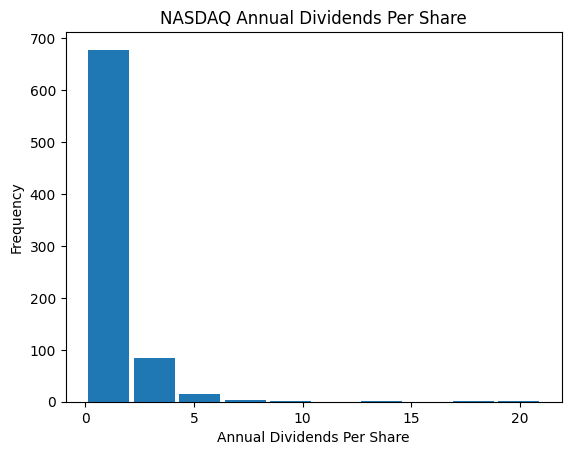

In [42]:
plt.hist(nasdaq_dataset["AnnualDividendsPerShare"], rwidth=0.9)
plt.title("NASDAQ Annual Dividends Per Share")
plt.xlabel("Annual Dividends Per Share")
plt.ylabel("Frequency")
plt.show()

In [43]:
print(f'FTSE Average value of the annual paid dividends per share {ftse_dataset["AnnualDividendsPerShare"].mean():.2f}')
print(f'FTSE Max paid value {ftse_dataset["AnnualDividendsPerShare"].max():.2f}')
print(f'FTSE Min paid value {ftse_dataset["AnnualDividendsPerShare"].min():.2f}')
print(f'FTSE Standard Deviation of the annual paid dividends per share {ftse_dataset["AnnualDividendsPerShare"].std():.3f}')

FTSE Average value of the annual paid dividends per share 0.36
FTSE Max paid value 4.45
FTSE Min paid value 0.01
FTSE Standard Deviation of the annual paid dividends per share 0.606


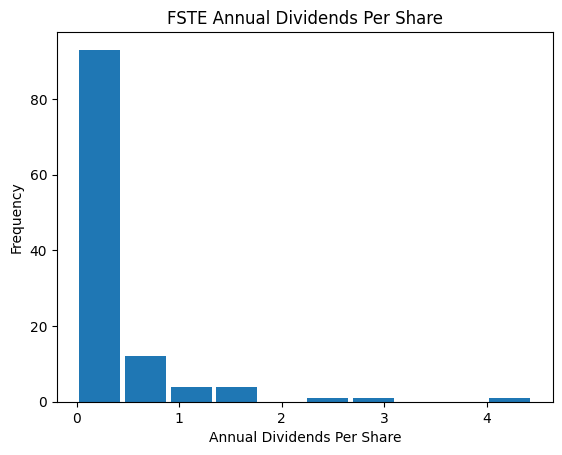

In [44]:
plt.hist(ftse_dataset["AnnualDividendsPerShare"], rwidth=0.9)
plt.title("FSTE Annual Dividends Per Share")
plt.xlabel("Annual Dividends Per Share")
plt.ylabel("Frequency")
plt.show()

In [45]:
print(f'NASDAQ Average Dividend Yield Ratio {nasdaq_dataset["DividendYield"].mean():.3f}')
print(f'NASDAQ Max Dividend Yield Ratio {nasdaq_dataset["DividendYield"].max():.3f}')
print(f'NASDAQ Min Dividend Yield Ratio {nasdaq_dataset["DividendYield"].min():.3f}')
print(f'NASDAQ Standard Deviation of the Dividend Yield {nasdaq_dataset["DividendYield"].std():.3f}')

NASDAQ Average Dividend Yield Ratio 4.877
NASDAQ Max Dividend Yield Ratio 94.430
NASDAQ Min Dividend Yield Ratio 0.020
NASDAQ Standard Deviation of the Dividend Yield 5.603


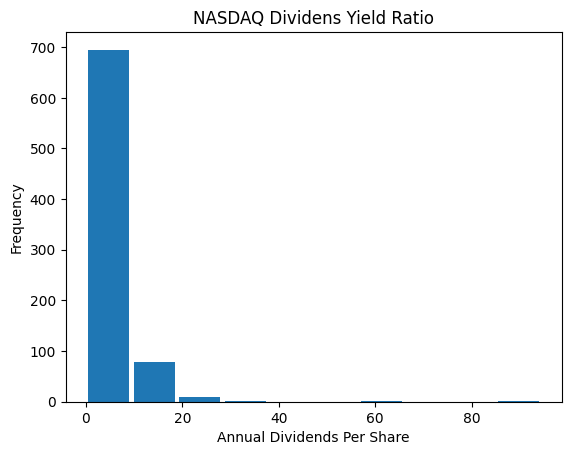

In [46]:
plt.hist(nasdaq_dataset["DividendYield"], rwidth=0.9)
plt.title("NASDAQ Dividens Yield Ratio")
plt.xlabel("Annual Dividends Per Share")
plt.ylabel("Frequency")
plt.show()

In [47]:
print(f'FTSE Average Dividend Yield Ratio {ftse_dataset["DividendYield"].mean():.3f}')
print(f'FTSE Max Dividend Yield Ratio {ftse_dataset["DividendYield"].max():.3f}')
print(f'FTSE Min Dividend Yield Ratio {ftse_dataset["DividendYield"].min():.3f}')
print(f'FTSE Standard Deviation of the Dividend Yield {ftse_dataset["DividendYield"].std():.3f}')

FTSE Average Dividend Yield Ratio 4.423
FTSE Max Dividend Yield Ratio 29.120
FTSE Min Dividend Yield Ratio 0.210
FTSE Standard Deviation of the Dividend Yield 3.412


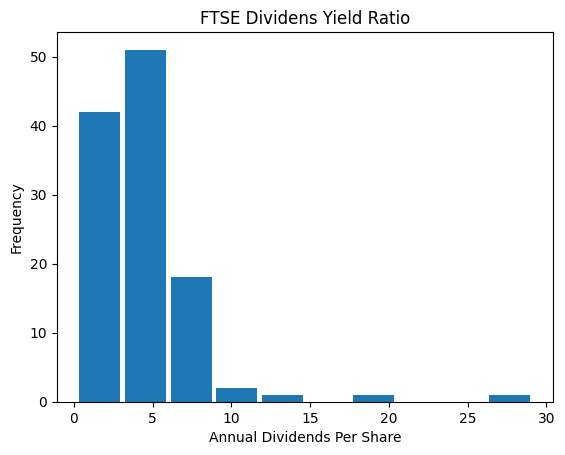

In [48]:
plt.hist(ftse_dataset["DividendYield"], rwidth=0.9)
plt.title("FTSE Dividens Yield Ratio")
plt.xlabel("Annual Dividends Per Share")
plt.ylabel("Frequency")
plt.show()

In [49]:
print(f'NASDAQ Average Payout Ratio {nasdaq_dataset["PayoutRatio"].mean():.3f}')
print(f'NASDAQ Max Payout Ratio {nasdaq_dataset["PayoutRatio"].max():.3f}')
print(f'NASDAQ Min Payout Ratio {nasdaq_dataset["PayoutRatio"].min():.3f}')
print(f'NASDAQ Standard Deviation of the Payout Ratio {nasdaq_dataset["PayoutRatio"].std():.3f}')

NASDAQ Average Payout Ratio 26.495
NASDAQ Max Payout Ratio 1265.000
NASDAQ Min Payout Ratio 0.810
NASDAQ Standard Deviation of the Payout Ratio 65.608


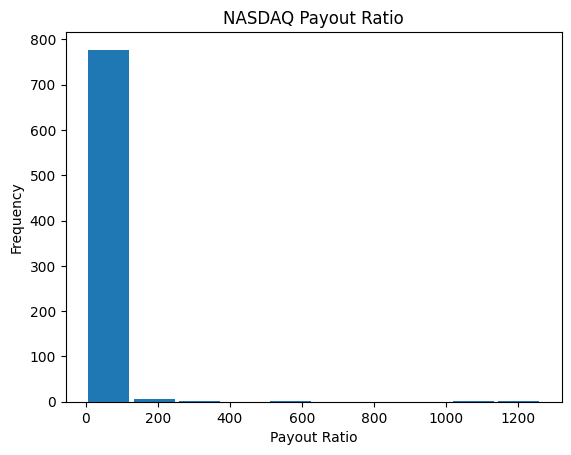

In [50]:
plt.hist(nasdaq_dataset["PayoutRatio"], rwidth=0.9)
plt.title("NASDAQ Payout Ratio")
plt.xlabel("Payout Ratio")
plt.ylabel("Frequency")
plt.show()

In [51]:
print(f'FTSE Average Payout Ratio {ftse_dataset["PayoutRatio"].mean():.3f}')
print(f'FTSE Max Payout Ratio {ftse_dataset["PayoutRatio"].max():.3f}')
print(f'FTSE Min Payout Ratio {ftse_dataset["PayoutRatio"].min():.3f}')
print(f'FTSE Standard Deviation of the Payout Ratio {ftse_dataset["PayoutRatio"].std():.3f}')

FTSE Average Payout Ratio 56.532
FTSE Max Payout Ratio 100.000
FTSE Min Payout Ratio 3.590
FTSE Standard Deviation of the Payout Ratio 27.210


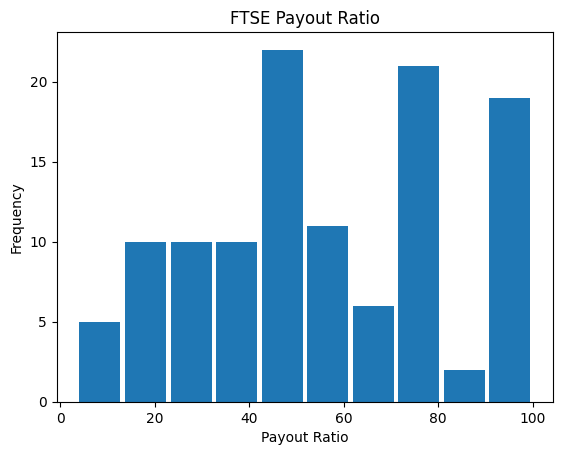

In [52]:
plt.hist(ftse_dataset["PayoutRatio"], rwidth=0.9)
plt.title("FTSE Payout Ratio")
plt.xlabel("Payout Ratio")
plt.ylabel("Frequency")
plt.show()

In [53]:
print(f'NASDAQ Average Retention Ratio {nasdaq_dataset["RetentionRatio"].mean():.3f}')
print(f'NASDAQ Max Retention Ratio {nasdaq_dataset["RetentionRatio"].max():.3f}')
print(f'NASDAQ Min Retention Ratio {nasdaq_dataset["RetentionRatio"].min():.3f}')
print(f'NASDAQ Standard Deviation of the Retentio Ratio {nasdaq_dataset["RetentionRatio"].std():.3f}')

NASDAQ Average Retention Ratio 0.735
NASDAQ Max Retention Ratio 0.992
NASDAQ Min Retention Ratio -11.650
NASDAQ Standard Deviation of the Retentio Ratio 0.656


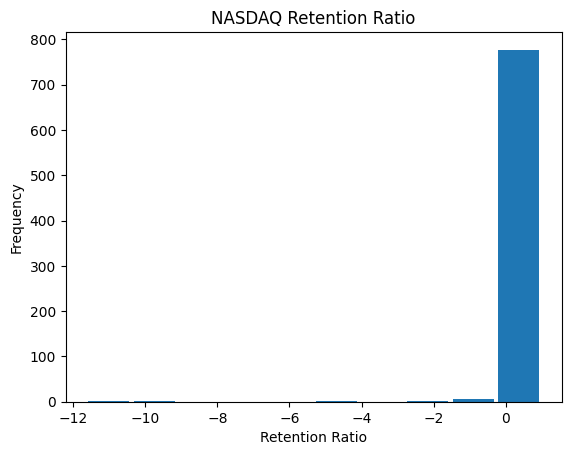

In [54]:
plt.hist(nasdaq_dataset["RetentionRatio"], rwidth=0.9)
plt.title("NASDAQ Retention Ratio")
plt.xlabel("Retention Ratio")
plt.ylabel("Frequency")
plt.show()

In [55]:
print(f'FTSE Average Retention Ratio {ftse_dataset["RetentionRatio"].mean():.3f}')
print(f'FTSE Max Retention Ratio {ftse_dataset["RetentionRatio"].max():.3f}')
print(f'FTSE Min Retention Ratio {ftse_dataset["RetentionRatio"].min():.3f}')
print(f'FTSE Standard Deviation of the Retentio Ratio {ftse_dataset["RetentionRatio"].std():.3f}')

FTSE Average Retention Ratio 0.435
FTSE Max Retention Ratio 0.964
FTSE Min Retention Ratio 0.000
FTSE Standard Deviation of the Retentio Ratio 0.272


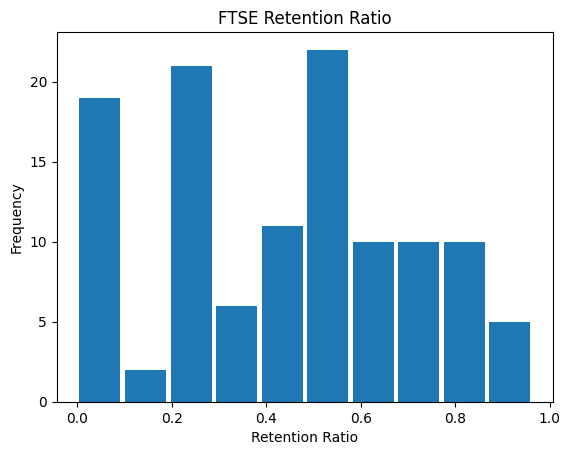

In [56]:
plt.hist(ftse_dataset["RetentionRatio"], rwidth=0.9)
plt.title("FTSE Retention Ratio")
plt.xlabel("Retention Ratio")
plt.ylabel("Frequency")
plt.show()

In [57]:
print(f'NASDAQ Average Payment Frequency {nasdaq_dataset["DividendCount"].mean():.3f}')
print(f'NASDAQ Max Payment Frequency {nasdaq_dataset["DividendCount"].max()}')
print(f'NASDAQ Min Payment Frequency {nasdaq_dataset["DividendCount"].min()}')
print(f'NASDAQ Standard Deviation of the Payment Frequency {nasdaq_dataset["DividendCount"].std():.3f}')

NASDAQ Average Payment Frequency 4.209
NASDAQ Max Payment Frequency 17.0
NASDAQ Min Payment Frequency 1.0
NASDAQ Standard Deviation of the Payment Frequency 1.864


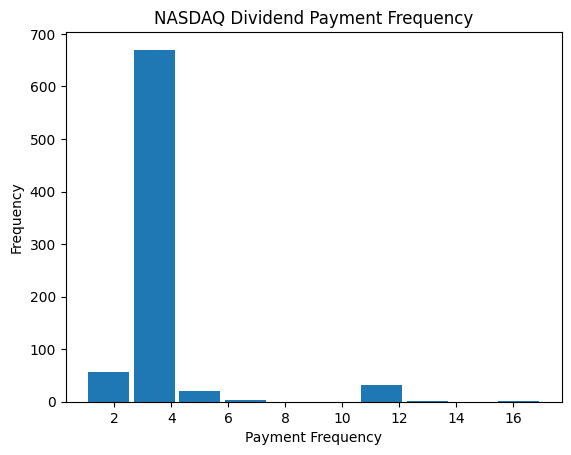

In [58]:
plt.hist(nasdaq_dataset["DividendCount"], rwidth=0.9)
plt.title("NASDAQ Dividend Payment Frequency")
plt.xlabel("Payment Frequency")
plt.ylabel("Frequency")
plt.show()

In [59]:
print(f'FTSE Average Payment Frequency {ftse_dataset["DividendCount"].mean():.3f}')
print(f'FTSE Max Payment Frequency {ftse_dataset["DividendCount"].max()}')
print(f'FTSE Min Payment Frequency {ftse_dataset["DividendCount"].min()}')
print(f'FTSE Standard Deviation of the Payment Frequency {ftse_dataset["DividendCount"].std():.3f}')

FTSE Average Payment Frequency 2.241
FTSE Max Payment Frequency 9.0
FTSE Min Payment Frequency 1.0
FTSE Standard Deviation of the Payment Frequency 0.920


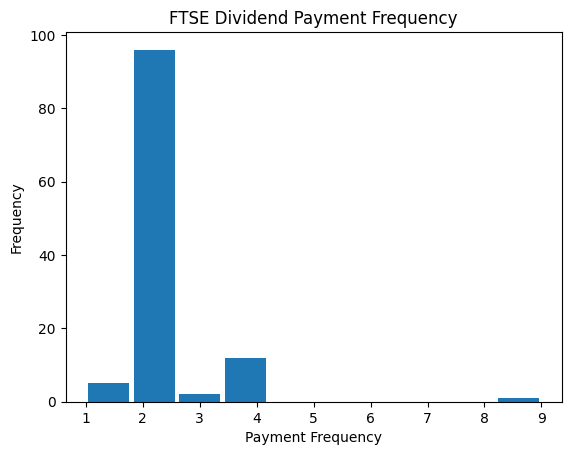

In [60]:
plt.hist(ftse_dataset["DividendCount"], rwidth=0.9)
plt.title("FTSE Dividend Payment Frequency")
plt.xlabel("Payment Frequency")
plt.ylabel("Frequency")
plt.show()

In [149]:
def get_sectors_from_dataset(dataframe):
    sector_mappings = get_sector_mappings()
    sectors = []
    for sector_name in sector_mappings:
        sector_id = sector_mappings[sector_name]
        if 'Sector_' + str(sector_id) not in dataframe.columns:
            continue
        subset = dataframe[dataframe['Sector_' + str(sector_id)] == 1]
        for sector in itertools.repeat(sector_name, len(subset)):
            sectors.append(sector)
    return sectors

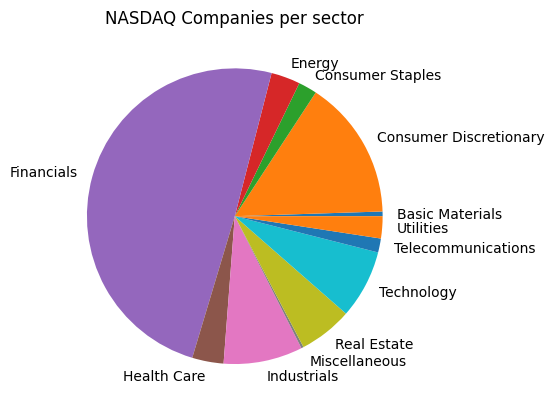

In [164]:
freq = Counter(get_sectors_from_dataset(nasdaq_dataset))

plt.pie(list(freq.values()), labels=list(freq.keys()))
plt.title("NASDAQ Companies per sector")
plt.show()

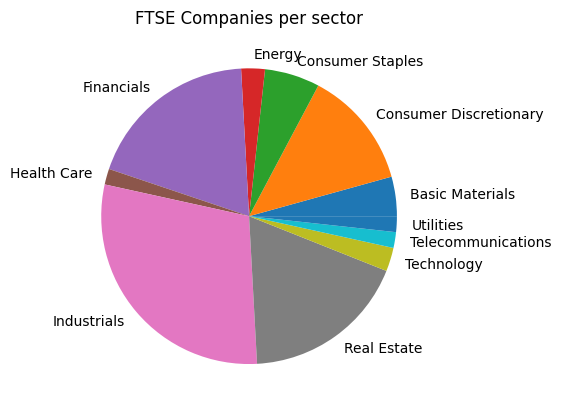

In [163]:
freq = Counter(get_sectors_from_dataset(ftse_dataset))

plt.pie(list(freq.values()), labels=list(freq.keys()))
plt.title("FTSE Companies per sector")
plt.show()

## Dataset Labeling

<p style="text-align: justify;text-justify: inter-word;">
In order to predict the attractiveness of a share, a new binary column was introduced, denoted as "attractiveness," wherein a value of 0 signifies "not attractive," while 1 indicates "attractive." The methodology for labeling stocks as attractive or not was outlined by Steffens (2023) and follows the subsequent steps:
</p>

- Stocks with a payout ratio equal to or exceeding 100% are categorized as not attractive.
- Stocks with a dividend yield equal to or greater than 60% are labeled as not attractive.
- Among stocks within each sector, those exhibiting the highest dividend yields are deemed attractive.
  - Only sectors with more than 10 companies will be considered.
- Within each index, the top 10% of stocks with the highest dividend yields are labeled as attractive.

<p style="text-align: justify;text-justify: inter-word;">
These steps provide a structured approach to identifying attractive stocks based on their financial indicators, ensuring a systematic and consistent labeling process. After the application of the proposed labeling process, the NASDAQ dataset presented 80 attractive companies and 706 not-attractive companies. Meanwhile, the FTSE dataset has 12 attractive shares and 104 not-attractive shares. These figures illustrate the distribution of attractive and not-attractive stocks identified through the labeling process across the respective datasets.
</p>


In [61]:
def get_most_attractiveness_stocks(dataframe, attractiveness_thresold):
    most_attractive_per_sector = pd.DataFrame()

    dataset = dataframe.copy()
    dataset = dataset[dataset["PayoutRatio"] < 100]
    dataset = dataset[dataset["DividendYield"] < 60]

    sector_mappings = get_sector_mappings()
    
    for sector_name in sector_mappings:
        sector_id = sector_mappings[sector_name]
        if 'Sector_' + str(sector_id) not in dataframe.columns:
            continue

        subset = dataset[dataset['Sector_' + str(sector_id)] == 1]
        
        if len(subset) < 10:
            continue
    
        most_attractive_stocks = subset.sort_values(by=['DividendYield','PayoutRatio'], ascending=False)[0:1]
        most_attractive_per_sector = pd.concat([most_attractive_per_sector, most_attractive_stocks], ignore_index=True)
    
    most_attractive_stocks = dataset.sort_values(by=['DividendYield','PayoutRatio'], ascending=False)[0:attractiveness_thresold]
    most_attractive_per_sector = pd.concat([most_attractive_per_sector, most_attractive_stocks], ignore_index=True)
    return most_attractive_per_sector.drop_duplicates()

In [62]:
def populate_attractiveness(dataset):
    most_attractive_stocks = get_most_attractiveness_stocks(dataset, int(np.round(len(dataset) * 0.1)))
    for index, row in dataset.iterrows():
        attractive = most_attractive_stocks[most_attractive_stocks["Symbol"] == row["Symbol"]]
        dataset.loc[index,"Attractiveness"] = len(attractive)

In [63]:
def get_test_dataset(dataset, include_sectors = False):
    ftse_dataset_2023 = pd.DataFrame()
    ftse_dataset_2023['AnnualDividendsPerShare'] = dataset['AnnualDividendsPerShare']
    ftse_dataset_2023['DividendYield'] = dataset['DividendYield']
    ftse_dataset_2023['PayoutRatio'] = dataset['PayoutRatio']
    ftse_dataset_2023['RetentionRatio'] = dataset['RetentionRatio']
    ftse_dataset_2023['DividendCount'] = dataset['DividendCount']
    if include_sectors:
        sector_mappings = get_sector_mappings()
        for sector_name in sector_mappings:
            sector_id = sector_mappings[sector_name]
            if 'Sector_' + str(sector_id) not in dataset.columns:
                ftse_dataset_2023['Sector_' + str(sector_id)] = 0
            else:
                ftse_dataset_2023['Sector_' + str(sector_id)] = dataset['Sector_' + str(sector_id)]
    return ftse_dataset_2023

In [64]:
populate_attractiveness(nasdaq_dataset)
nasdaq_dataset['Attractiveness'].value_counts()

Attractiveness
0.0    706
1.0     80
Name: count, dtype: int64

In [65]:
nasdaq_dataset.sort_values(by=['DividendYield','PayoutRatio'], ascending=False)

,Symbol,AnnualDividendsPerShare,DividendYield,PayoutRatio,RetentionRatio,DividendCount,Sector_1,Sector_2,Sector_3,Sector_4,Sector_5,Sector_6,Sector_7,Sector_8,Sector_9,Sector_10,Sector_11,Sector_12,Attractiveness
55,AUVIP,2.6250,94.43,49.752447,0.502476,6.0,0,1,0,0,0,0,0,0,0,0,0,0,0.0
165,CSSEP,2.4372,62.98,49.752447,0.502476,12.0,0,1,0,0,0,0,0,0,0,0,0,0,0.0
517,OCCI,2.4000,35.98,18.302007,0.816980,5.0,0,0,0,0,1,0,0,0,0,0,0,0,1.0
173,CUBA,0.6945,24.80,18.302007,0.816980,2.0,0,0,0,0,1,0,0,0,0,0,0,0,1.0
370,IEP,4.0000,23.60,49.752447,0.502476,4.0,0,1,0,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,NWLI,0.3600,0.07,14.370000,0.856300,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0.0
482,NBN,0.0400,0.07,8.320000,0.916800,4.0,0,0,0,0,1,0,0,0,0,0,0,0,0.0
759,WIRE,0.0800,0.04,8.400000,0.916000,4.0,0,0,0,0,0,0,1,0,0,0,0,0,0.0
502,NVDA,0.1600,0.03,64.930000,0.350700,4.0,0,0,0,0,0,0,0,0,0,1,0,0,0.0


In [66]:
populate_attractiveness(ftse_dataset)
ftse_dataset['Attractiveness'].value_counts()

Attractiveness
0.0    104
1.0     12
Name: count, dtype: int64

In [67]:
ftse_dataset.sort_values(by=['DividendYield','PayoutRatio'], ascending=False)

,Symbol,DividendYield,PayoutRatio,AnnualDividendsPerShare,RetentionRatio,DividendCount,Sector_1,Sector_2,Sector_3,Sector_4,Sector_5,Sector_6,Sector_7,Sector_9,Sector_10,Sector_11,Sector_12,Attractiveness
212,DEC,29.12,16.390000,2.669,0.836100,4.0,0,0,0,1,0,0,0,0,0,0,0,1.0
239,CBG,18.70,100.000000,0.675,0.000000,2.0,0,0,0,0,1,0,0,0,0,0,0,0.0
225,ENOG,11.86,58.195000,1.200,0.418050,4.0,0,0,0,1,0,0,0,0,0,0,0,1.0
78,ABDN,9.81,100.000000,0.146,0.000000,2.0,0,0,0,0,1,0,0,0,0,0,0,0.0
242,HBR,8.94,100.000000,0.240,0.000000,2.0,0,0,0,1,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,ESNT,1.25,51.191563,0.022,0.488084,2.0,0,0,0,0,0,0,1,0,0,0,0,0.0
14,OXIG,0.93,18.690000,0.195,0.813100,2.0,0,0,0,0,0,0,1,0,0,0,0,0.0
120,SNR,0.92,21.250000,0.016,0.787500,2.0,0,0,0,0,0,0,1,0,0,0,0,0.0
241,FUTR,0.57,3.590000,0.034,0.964100,1.0,0,1,0,0,0,0,0,0,0,0,0,0.0


## Random forest algorithm

<p style="text-align: justify;text-justify: inter-word;">
Based on the definition of Tan, Yan, Zhu (2019) the Random Forest algorithm creates multiple decision trees using subsets of the dataset and combines the predictions of these trees to obtain the final result in predicting the upward and downward movements of the index. The process of constructing a random forest is simple. In the random forest algorithm, firstly, the number of decision trees (n) to be created is determined according to the characteristics of the dataset. The Random Forest algorithm was provided by Scikit-learn (2024), this algorithm supports vast options of parameters such as “n_estimators” which represents the number of trees in the forest, “class_weight” which is the weights associated with the available classes, if not given, all classes are supposed to have weight one. Acording to Scikit-learn (2024), the main parameters to adjust when using these methods is n_estimators and max_features. The former is the number of trees in the forest. The larger the better, but also the longer it will take to compute. In addition, note that results will stop getting significantly better beyond a critical number of trees.
</p>
<p style="text-align: justify;text-justify: inter-word;">
In the context of this study, the Random Forest algorithm was employed for the classification of stock attractiveness. The models were trained using the NASDAQ dataset, while the FTSE dataset served as the test dataset. Through iterative exploration and testing, the most accurate models were derived with specific parameter configurations:
</p>

- Model 1: This initial model incorporated all features from the dataset, excluding the Symbol column.
    - Parameters: n_estimators=2, class_weight='balanced_subsample'
- Model 2: The second trained model focused on a subset of features, specifically: AnnualDiv-
idendsPerShare, DividendYield, PayoutRatio, RetentionRatio, and DividendCount.
    - Parameters: n_estimators=1, class_weight='balanced'
- Model 3: Similar to Model 2, the third model also utilized the columns: AnnualDividendsPer- Share, DividendYield, PayoutRatio, RetentionRatio, and DividendCount.
    - Parameters: n_estimators=1, class_weight='balanced'

| Model   | Dataset | Precision | Recall | Accuracy |
|---------|---------|-----------|--------|----------|
| Model 1 | NASDAQ  | 99%       | 99%    | 99%      |
| Model 1 | FTSE    | 96%       | 58%    | 91%      |
| Model 2 | NASDAQ  | 100%      | 100%   | 100%     |
| Model 2 | FTSE    | 96%       | 58%    | 91%      |
| Model 3 | NASDAQ  | 100%      | 98%    | 99%      |
| Model 3 | FTSE    | 96%       | 58%    | 91%      |

In [68]:
pipeline = Pipeline([
  ('scaler', StandardScaler()),
  ('feature_selection', SelectFromModel(LinearSVC(dual="auto", penalty="l1", random_state=0))),
  ('classification', RandomForestClassifier(n_estimators=3, class_weight='balanced_subsample', random_state=0))
])
pipeline.fit(nasdaq_dataset.iloc[::,1:-1], nasdaq_dataset['Attractiveness'])
y_pred = pipeline.predict(nasdaq_dataset.iloc[::,1:-1])

In [69]:
print(classification_report(nasdaq_dataset['Attractiveness'], y_pred, target_names=['not-attractive', 'attractive']))

                precision    recall  f1-score   support

not-attractive       1.00      1.00      1.00       706
    attractive       0.99      0.97      0.98        80

      accuracy                           1.00       786
     macro avg       0.99      0.99      0.99       786
  weighted avg       1.00      1.00      1.00       786



In [70]:
print(confusion_matrix(nasdaq_dataset['Attractiveness'], y_pred))

[[705   1]
 [  2  78]]


In [71]:
y_pred = pipeline.predict(get_test_dataset(ftse_dataset, True))

In [72]:
print(classification_report(ftse_dataset['Attractiveness'], y_pred, target_names=['not-attractive', 'attractive']))

                precision    recall  f1-score   support

not-attractive       0.91      1.00      0.95       104
    attractive       1.00      0.17      0.29        12

      accuracy                           0.91       116
     macro avg       0.96      0.58      0.62       116
  weighted avg       0.92      0.91      0.88       116



In [73]:
print(confusion_matrix(ftse_dataset['Attractiveness'], y_pred))

[[104   0]
 [ 10   2]]


In [74]:
pipeline = Pipeline([
  ('scaler', StandardScaler()),
  ('feature_selection', SelectFromModel(LinearSVC(dual="auto", penalty="l1", random_state=0))),
  ('classification', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=0))
])
pipeline.fit(nasdaq_dataset.iloc[::,1:6], nasdaq_dataset['Attractiveness'])
y_pred = pipeline.predict(nasdaq_dataset.iloc[::,1:6])

In [75]:
print(classification_report(nasdaq_dataset['Attractiveness'], y_pred, target_names=['not-attractive', 'attractive']))

                precision    recall  f1-score   support

not-attractive       1.00      1.00      1.00       706
    attractive       1.00      1.00      1.00        80

      accuracy                           1.00       786
     macro avg       1.00      1.00      1.00       786
  weighted avg       1.00      1.00      1.00       786



In [76]:
print(confusion_matrix(nasdaq_dataset['Attractiveness'], y_pred))

[[706   0]
 [  0  80]]


In [77]:
y_pred = pipeline.predict(get_test_dataset(ftse_dataset))

In [78]:
print(classification_report(ftse_dataset['Attractiveness'], y_pred, target_names=['not-attractive', 'attractive']))

                precision    recall  f1-score   support

not-attractive       0.91      1.00      0.95       104
    attractive       1.00      0.17      0.29        12

      accuracy                           0.91       116
     macro avg       0.96      0.58      0.62       116
  weighted avg       0.92      0.91      0.88       116



In [79]:
print(confusion_matrix(ftse_dataset['Attractiveness'], y_pred))

[[104   0]
 [ 10   2]]


In [80]:
pipeline = Pipeline([
  ('scaler', StandardScaler()),
  ('feature_selection', SelectFromModel(LinearSVC(dual="auto", penalty="l1", random_state=0))),
  ('classification', RandomForestClassifier(n_estimators=10000, class_weight='balanced_subsample', random_state=0))
])
pipeline.fit(nasdaq_dataset.iloc[::,1:6], nasdaq_dataset['Attractiveness'])
y_pred = pipeline.predict(nasdaq_dataset.iloc[::,1:6])

In [81]:
print(classification_report(nasdaq_dataset['Attractiveness'], y_pred, target_names=['not-attractive', 'attractive']))

                precision    recall  f1-score   support

not-attractive       1.00      1.00      1.00       706
    attractive       1.00      1.00      1.00        80

      accuracy                           1.00       786
     macro avg       1.00      1.00      1.00       786
  weighted avg       1.00      1.00      1.00       786



In [82]:
print(confusion_matrix(nasdaq_dataset['Attractiveness'], y_pred))

[[706   0]
 [  0  80]]


In [83]:
y_pred = pipeline.predict(get_test_dataset(ftse_dataset))

In [84]:
print(classification_report(ftse_dataset['Attractiveness'], y_pred, target_names=['not-attractive', 'attractive']))

                precision    recall  f1-score   support

not-attractive       0.91      1.00      0.95       104
    attractive       1.00      0.17      0.29        12

      accuracy                           0.91       116
     macro avg       0.96      0.58      0.62       116
  weighted avg       0.92      0.91      0.88       116



In [85]:
print(confusion_matrix(ftse_dataset['Attractiveness'], y_pred))

[[104   0]
 [ 10   2]]


## Support vector machines algorithm

<p style="text-align: justify;text-justify: inter-word;">
According to Ayyildiz and Iskenderoglu (2024), the Support Vector Machine (SVM) is particularly effective in machine learning for classification problems. It works by creating an optimized separating hyperplane to assign data points to specific classes. The SVM algorithm is based on the principle of structural risk minimization, which aims to minimize the upper bound of the generalization error. The SVM algorithm was provided by Scikit-learn (2024), this algorithm supports vast options of parameters such as "C" that is a regularization parameter where the strength of the regularization is inversely proportional to C, "kernel" defines which kernel fucntion will be applied linear, polynomial, rbf, and sigmoid.
</p>
<p style="text-align: justify;text-justify: inter-word;">
In the context of this study, the SVM algorithm was employed for the classification of stock attractiveness. The models were trained using the NASDAQ dataset, while the FTSE dataset served as the test dataset. Through iterative exploration and testing, the most accurate models were derived with specific parameter configurations:
</p>

- Model 1: This initial model focused on a subset of features, specifically: AnnualDividendsPerShare, DividendYield, PayoutRatio, RetentionRatio, and DividendCount.
    - Parameters: kernel='sigmoid', C=1.0
- Model 2: Similar to Model 1, the second trained model focused on a subset of features, specifically: AnnualDividendsPerShare, DividendYield, PayoutRatio, RetentionRatio, and DividendCount.
    - Parameters: kernel='sigmoid', C=10
- Model 3: The third model incorporated all features from the dataset, excluding the Symbol column.
    - Parameters: kernel='sigmoid', C=1.0

| Model   | Dataset | Precision | Recall | Accuracy |
|---------|---------|-----------|--------|----------|
| Model 1 | NASDAQ  | 81%       | 81%    | 93%      |
| Model 1 | FTSE    | 77%       | 77%    | 91%      |
| Model 2 | NASDAQ  | 78%       | 77%    | 92%      |
| Model 2 | FTSE    | 77%       | 88%    | 91%      |
| Model 3 | NASDAQ  | 83%       | 74%    | 93%      |
| Model 3 | FTSE    | 62%       | 53%    | 89%      |

In [86]:
pipeline = Pipeline([
  ('scaler', StandardScaler()),
  ('feature_selection', SelectFromModel(LinearSVC(dual="auto", penalty="l1", random_state=0))),
  ('classification', SVC(kernel='sigmoid', random_state=0))
])
pipeline.fit(nasdaq_dataset.iloc[::,1:6], nasdaq_dataset['Attractiveness'])
y_pred = pipeline.predict(nasdaq_dataset.iloc[::,1:6])

In [87]:
print(classification_report(nasdaq_dataset['Attractiveness'], y_pred, target_names=['not-attractive', 'attractive']))

                precision    recall  f1-score   support

not-attractive       0.96      0.96      0.96       706
    attractive       0.66      0.65      0.65        80

      accuracy                           0.93       786
     macro avg       0.81      0.81      0.81       786
  weighted avg       0.93      0.93      0.93       786



In [88]:
print(confusion_matrix(nasdaq_dataset['Attractiveness'], y_pred))

[[679  27]
 [ 28  52]]


In [89]:
y_pred = pipeline.predict(get_test_dataset(ftse_dataset))

In [90]:
print(classification_report(ftse_dataset['Attractiveness'], y_pred, target_names=['not-attractive', 'attractive']))

                precision    recall  f1-score   support

not-attractive       0.95      0.95      0.95       104
    attractive       0.58      0.58      0.58        12

      accuracy                           0.91       116
     macro avg       0.77      0.77      0.77       116
  weighted avg       0.91      0.91      0.91       116



In [91]:
print(confusion_matrix(ftse_dataset['Attractiveness'], y_pred))

[[99  5]
 [ 5  7]]


In [92]:
pipeline = Pipeline([
  ('scaler', StandardScaler()),
  ('feature_selection', SelectFromModel(LinearSVC(dual="auto", penalty="l1", random_state=0))),
  ('classification', SVC(kernel='sigmoid', C=10, random_state=0))
])
pipeline.fit(nasdaq_dataset.iloc[::,1:6], nasdaq_dataset['Attractiveness'])
y_pred = pipeline.predict(nasdaq_dataset.iloc[::,1:6])

In [93]:
print(classification_report(nasdaq_dataset['Attractiveness'], y_pred, target_names=['not-attractive', 'attractive']))

                precision    recall  f1-score   support

not-attractive       0.95      0.96      0.96       706
    attractive       0.61      0.57      0.59        80

      accuracy                           0.92       786
     macro avg       0.78      0.77      0.77       786
  weighted avg       0.92      0.92      0.92       786



In [94]:
print(confusion_matrix(nasdaq_dataset['Attractiveness'], y_pred))

[[677  29]
 [ 34  46]]


In [95]:
y_pred = pipeline.predict(get_test_dataset(ftse_dataset))

In [96]:
print(classification_report(ftse_dataset['Attractiveness'], y_pred, target_names=['not-attractive', 'attractive']))

                precision    recall  f1-score   support

not-attractive       0.98      0.92      0.95       104
    attractive       0.56      0.83      0.67        12

      accuracy                           0.91       116
     macro avg       0.77      0.88      0.81       116
  weighted avg       0.94      0.91      0.92       116



In [97]:
print(confusion_matrix(ftse_dataset['Attractiveness'], y_pred))

[[96  8]
 [ 2 10]]


In [98]:
pipeline = Pipeline([
  ('scaler', StandardScaler()),
  ('feature_selection', SelectFromModel(LinearSVC(dual="auto", penalty="l1", random_state=0))),
  ('classification', SVC(kernel='sigmoid', random_state=0))
])
pipeline.fit(nasdaq_dataset.iloc[::,1:-1], nasdaq_dataset['Attractiveness'])
y_pred = pipeline.predict(nasdaq_dataset.iloc[::,1:-1])

In [99]:
print(classification_report(nasdaq_dataset['Attractiveness'], y_pred, target_names=['not-attractive', 'attractive']))

                precision    recall  f1-score   support

not-attractive       0.95      0.98      0.96       706
    attractive       0.71      0.51      0.59        80

      accuracy                           0.93       786
     macro avg       0.83      0.74      0.78       786
  weighted avg       0.92      0.93      0.92       786



In [100]:
print(confusion_matrix(nasdaq_dataset['Attractiveness'], y_pred))

[[689  17]
 [ 39  41]]


In [101]:
y_pred = pipeline.predict(get_test_dataset(ftse_dataset, True))

In [102]:
print(classification_report(ftse_dataset['Attractiveness'], y_pred, target_names=['not-attractive', 'attractive']))

                precision    recall  f1-score   support

not-attractive       0.90      0.98      0.94       104
    attractive       0.33      0.08      0.13        12

      accuracy                           0.89       116
     macro avg       0.62      0.53      0.54       116
  weighted avg       0.84      0.89      0.86       116



In [103]:
print(confusion_matrix(ftse_dataset['Attractiveness'], y_pred))

[[102   2]
 [ 11   1]]


## Extreme gradient boosting (XGBoost)

<p style="text-align: justify;text-justify: inter-word;">
Dezhkam, and Manzuri (2023) define that the main idea behind most boosting algorithms is to iteratively apply a weak learner to training data and assign more weights to misclassified observations to find a new decision stump for them. Finally, all learned models are aggregated to form a strong learner able to correctly classify all training samples. Acording to DMLC (2024), Before running XGBoost, we must set three types of parameters: general parameters, booster parameters and task parameters. The general parameters relate to which booster we are using to do boosting, commonly tree or linear model. Booster parameters depend on which booster you have chosen, and Learning task parameters decide on the learning scenario. The used implementation of XGBoost was provided by the DMLC team.
</p>
<p style="text-align: justify;text-justify: inter-word;">
In the context of this study, the XGBoost algorithm was employed for the classification of stock attractiveness. The models were trained using the NASDAQ dataset, while the FTSE dataset served as the test dataset. Through iterative exploration and testing, the most accurate models were derived with specific parameter configurations:
</p>

- Model 1: This initial model focused on a subset of features, specifically: AnnualDividendsPerShare, DividendYield, PayoutRatio, RetentionRatio, and DividendCount.
    - Parameters: booster='gblinear', objective='binary:logistic', subsample=0.3
- Model 2: Similar to Model 1, the second trained model focused on a subset of features, specifically: AnnualDividendsPerShare, DividendYield, PayoutRatio, RetentionRatio, and DividendCount.
    - Parameters: objective='reg:pseudohubererror', use_label_encoder=True
- Model 3: The third model incorporated all features from the dataset, excluding the Symbol column.
    - Parameters: booster='dart', sample_type='weighted',objective='multi:softmax', num_class=2, subsample=0.5

| Model   | Dataset | Precision | Recall | Accuracy |
|---------|---------|-----------|--------|----------|
| Model 1 | NASDAQ  | 86%       | 66%    | 92%      |
| Model 1 | FTSE    | 79%       | 58%    | 91%      |
| Model 2 | NASDAQ  | 99%       | 99%    | 99%      |
| Model 2 | FTSE    | 96%       | 67%    | 93%      |
| Model 3 | NASDAQ  | 98%       | 99%    | 99%      |
| Model 3 | FTSE    | 83%       | 70%    | 92%      |

In [104]:
model = XGBRFClassifier(objective='binary:logistic', use_label_encoder=False)
model.fit(nasdaq_dataset.iloc[::,1:6], nasdaq_dataset['Attractiveness'])

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, reg_alpha=None, ...)

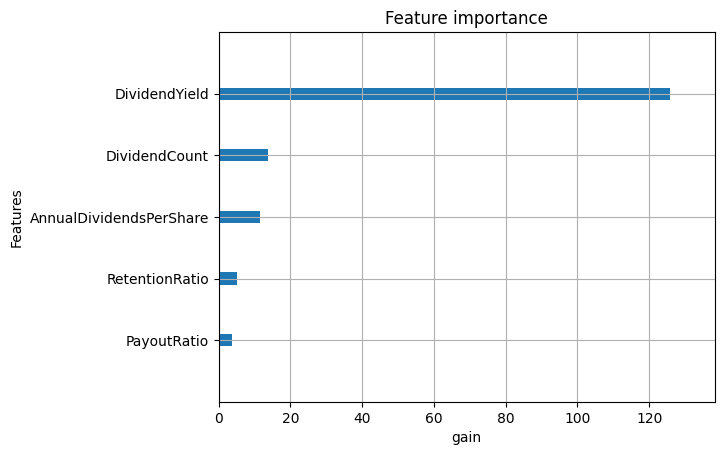

In [105]:
plot_importance(model, importance_type='gain', show_values=False, xlabel='gain')
plt.show()

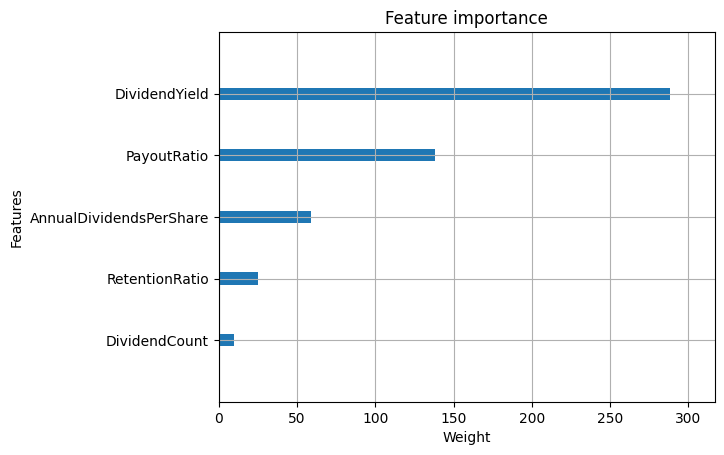

In [106]:
plot_importance(model, importance_type='weight', show_values=False, xlabel='Weight')
plt.show()

In [107]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(nasdaq_dataset.iloc[::,1:-1])

model = XGBRFClassifier(booster='gblinear', objective='binary:logistic', subsample=0.3, seed=0)
model.fit(scaled_features, nasdaq_dataset['Attractiveness'])
y_pred = model.predict(scaled_features)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [16:49:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "colsample_bynode", "num_parallel_tree", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


In [108]:
print(classification_report(nasdaq_dataset['Attractiveness'], y_pred, target_names=['not-attractive', 'attractive']))

                precision    recall  f1-score   support

not-attractive       0.93      0.99      0.96       706
    attractive       0.79      0.34      0.47        80

      accuracy                           0.92       786
     macro avg       0.86      0.66      0.72       786
  weighted avg       0.92      0.92      0.91       786



In [109]:
print(confusion_matrix(nasdaq_dataset['Attractiveness'], y_pred))

[[699   7]
 [ 53  27]]


In [110]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(get_test_dataset(ftse_dataset, True))
y_pred = model.predict(scaled_features)

In [111]:
print(classification_report(ftse_dataset['Attractiveness'], y_pred, target_names=['not-attractive', 'attractive']))

                precision    recall  f1-score   support

not-attractive       0.91      0.99      0.95       104
    attractive       0.67      0.17      0.27        12

      accuracy                           0.91       116
     macro avg       0.79      0.58      0.61       116
  weighted avg       0.89      0.91      0.88       116



In [112]:
print(confusion_matrix(ftse_dataset['Attractiveness'], y_pred))

[[103   1]
 [ 10   2]]


In [113]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(nasdaq_dataset.iloc[::,1:-1])

model = XGBRFClassifier(objective='reg:pseudohubererror', use_label_encoder=True, seed=0)
model.fit(scaled_features, nasdaq_dataset['Attractiveness'])
y_pred = model.predict(scaled_features)

In [114]:
print(classification_report(nasdaq_dataset['Attractiveness'], y_pred, target_names=['not-attractive', 'attractive']))

                precision    recall  f1-score   support

not-attractive       1.00      1.00      1.00       706
    attractive       0.99      0.99      0.99        80

      accuracy                           1.00       786
     macro avg       0.99      0.99      0.99       786
  weighted avg       1.00      1.00      1.00       786



In [115]:
print(confusion_matrix(nasdaq_dataset['Attractiveness'], y_pred))

[[705   1]
 [  1  79]]


In [116]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(get_test_dataset(ftse_dataset, True))
y_pred = model.predict(scaled_features)

In [117]:
print(classification_report(ftse_dataset['Attractiveness'], y_pred, target_names=['not-attractive', 'attractive']))

                precision    recall  f1-score   support

not-attractive       0.93      1.00      0.96       104
    attractive       1.00      0.33      0.50        12

      accuracy                           0.93       116
     macro avg       0.96      0.67      0.73       116
  weighted avg       0.94      0.93      0.92       116



In [118]:
print(confusion_matrix(ftse_dataset['Attractiveness'], y_pred))

[[104   0]
 [  8   4]]


In [119]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(nasdaq_dataset.iloc[::,1:-1])

model = XGBRFClassifier(booster='dart', sample_type='weighted',objective='multi:softmax', num_class=2, subsample=0.5, seed=0)
model.fit(scaled_features, nasdaq_dataset['Attractiveness'])
y_pred = model.predict(scaled_features)

In [120]:
print(classification_report(nasdaq_dataset['Attractiveness'], y_pred, target_names=['not-attractive', 'attractive']))

                precision    recall  f1-score   support

not-attractive       1.00      1.00      1.00       706
    attractive       0.96      0.99      0.98        80

      accuracy                           0.99       786
     macro avg       0.98      0.99      0.99       786
  weighted avg       1.00      0.99      0.99       786



In [121]:
print(confusion_matrix(nasdaq_dataset['Attractiveness'], y_pred))

[[703   3]
 [  1  79]]


In [122]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(get_test_dataset(ftse_dataset, True))
y_pred = model.predict(scaled_features)

In [123]:
print(classification_report(ftse_dataset['Attractiveness'], y_pred, target_names=['not-attractive', 'attractive']))

                precision    recall  f1-score   support

not-attractive       0.94      0.98      0.96       104
    attractive       0.71      0.42      0.53        12

      accuracy                           0.92       116
     macro avg       0.83      0.70      0.74       116
  weighted avg       0.91      0.92      0.91       116



In [124]:
print(confusion_matrix(ftse_dataset['Attractiveness'], y_pred))

[[102   2]
 [  7   5]]


# Conclusion

<p style="text-align: justify;text-justify: inter-word;">Throughout this coursework, we conducted a comprehensive comparative analysis of dividend-distributing shares from the NASDAQ and FTSE-250 exchanges in 2023. Our examination revealed notable similarities in financial metrics, including dividend yield, payout ratio, and retention ratio. Notably, while the US exchange averaged four dividend distributions per year, the UK exchange averaged only two. NASDAQ companies tended to distribute higher values on average compared to FTSE companies. However, the FTSE index demonstrated greater stability, with smaller standard deviation values across most evaluated financial metrics and fewer outliers compared to the NASDAQ index.</p>
<p style="text-align: justify;text-justify: inter-word;">Following the comparative analysis, we executed a manual labeling process to categorize all evaluated stocks as either attractive or not-attractive. With the samples labeled, we trained various machine learning models to predict stock attractiveness. Notably, only NASDAQ companies were used for the training phase, while the quality of the models was assessed using FTSE companies. The results of the created models in both the training and test datasets are summarized in the below table provided.
</p>

| Model                   | Dataset   | Precision | Recall | Accuracy |
|-------------------------|-----------|-----------|--------|----------|
| Random Forest - Model 1 | Training  | 99%       | 99%    | 99%      |
| Random Forest - Model 1 | Test      | 96%       | 58%    | 91%      |
| Random Forest - Model 2 | Training  | 100%      | 100%   | 100%     |
| Random Forest - Model 2 | Test      | 96%       | 58%    | 91%      |
| Random Forest - Model 3 | Training  | 100%      | 98%    | 99%      |
| Random Forest - Model 3 | Test      | 96%       | 58%    | 91%      |
| SVM - Model 1           | Training  | 81%       | 81%    | 93%      |
| SVM - Model 1           | Test      | 77%       | 77%    | 91%      |
| SVM - Model 2           | Training  | 78%       | 77%    | 92%      |
| SVM - Model 2           | Test      | 77%       | 88%    | 91%      |
| SVM - Model 3           | Training  | 83%       | 74%    | 93%      |
| SVM - Model 3           | Test      | 62%       | 53%    | 89%      |
| XGBoost - Model 1       | Training  | 86%       | 66%    | 92%      |
| XGBoost - Model 1       | Test      | 79%       | 58%    | 91%      |
| XGBoost - Model 2       | Training  | 99%       | 99%    | 99%      |
| XGBoost - Model 2       | Test      | 96%       | 67%    | 93%      |
| XGBoost - Model 3       | Training  | 98%       | 99%    | 99%      |
| XGBoost - Model 3       | Test      | 83%       | 70%    | 92%      |

<p style="text-align: justify;text-justify: inter-word;">All the created models present good metrics evaluating the training datasets. The Random forest models overperformed in the training dataset being able to predict 100% of the cases, indicating a possible overfitting. Regarding the test dataset, all the models presented a good accuracy from 89% to 93%. In contrast with the accuracy, the ability to correctly classify the interest class was poor. Only three models present the recall metric with a percentage equal to or greater than 70%. The accuracy was high in the test dataset in reason of the number of samples in the interest class only represents around 10% of the data. To determine the best model, the main statistical metric evaluated was the recall since the target of the created models is to work as a guide to discerning the attractiveness and potential sustainability of dividend-paying stocks, summarising the ability to predict correctly a company as attractive. The SVM - Model 2 was the best model considering the target problem. This model presented similar results in all the evaluated metrics in the training and test datasets.
</p>
<p style="text-align: justify;text-justify: inter-word;"> As an extension work, it's possible to apply the proposed machine learning models to different stock exchanges such as SP500, IBOVESPA, and Tokio Exchange and see the accuracy of the proposed models in different markets. Additionally, revisiting the labeling process to explore alternative approaches to classify a company as attractive or not. Importantly, the data utilized in this study is public and is intended solely for academic purposes, with no intention to harm or benefit any specific company mentioned.</p>

# References

- Amos, D. (2023) A practical introduction to web scraping in Python, Real Python. Available at: https://realpython.com/python-web-scraping-practical-introduction/ (Accessed: 02 January 2024).
- Ayyildiz, N. and Iskenderoglu, O. (2024) How effective is machine learning in stock market predictions?, Heliyon, 10(2). doi:10.1016/j.heliyon.2024.e24123.
- Brownlee, J. (2019) How to one hot encode sequence data in python, MachineLearningMastery.com. Available at: https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/ (Accessed: 03 January 2024).
- Coutts. (2024) What is the FTSE 250? Private Banking and Wealth Management. Available at: https://www.coutts.com/help-centre/investment-faqs/investment-faqs/general/what-is-the-ftse-250.html (Accessed: 17 March 2024).
- Dezhkam, A. and Manzuri, M.T. (2023) Forecasting stock market for an efficient portfolio by combining XGBoost and Hilbert–Huang​ Transform, Engineering Applications of Artificial Intelligence, 118, p. 105626. doi:10.1016/j.engappai.2022.105626.
- DMLC. (2024) XGBoost Parameters. Available at: https://xgboost.readthedocs.io/en/stable/parameter.html (Accessed: 17 March 2024). 
- Gordon, M. J. (1959) Dividends, Earnings, and Stock Prices. The Review of Economics and Statistics, vol. 41, no. 2, pp. 99–105
- Kimoto, T. et al. (1990) Stock market prediction system with Modular Neural Networks, 1990 IJCNN International Joint Conference on Neural Networks [Preprint]. doi:10.1109/ijcnn.1990.137535. 
- P.K.H. Phua, Xiaotian Zhu, and Chung Haur Koh. (2003) Forecasting stockindex increments using neural networks with trust region methods. In Proceedings of the International Joint Conference on Neural Networks, volume 1, pages 260–265 vol.1
- Scikit-learn. (2024) 1.11. ensembles: Gradient boosting, random forests, bagging, voting, stacking (2024) scikit. Available at: https://scikit-learn.org/stable/modules/ensemble.html#random-forests-and-other-randomized-tree-ensembles (Accessed: 17 March 2024).
- Scikit-learn. (2024) 1.4. Support Vector Machines (2024) scikit. Available at: https://scikit-learn.org/stable/modules/ensemble.html#random-forests-and-other-randomized-tree-ensembles (Accessed: 17 March 2024).
- Steffens, H. P. (2023) Analytic Dividend Analysis. University of London.
- Tan, Z., Yan, Z. and Zhu, G. (2019) Stock selection with Random Forest: An exploitation of excess return in the Chinese stock market, Heliyon, 5(8). doi:10.1016/j.heliyon.2019.e02310. 
- The investopedia team. (2023) How to calculate the dividend payout ratio from an income statement, Investopedia. Reviewed by C. Rhinehart. Available at: https://www.investopedia.com/ask/answers/012015/how-do-i-calculate-dividend-payout-ratio-income-statement.asp (Accessed: 25 December 2023).